# 서약
* 당연한 것을 아래와 같이 한번 다지고 가도록 하겠습니다. 아래 보고서는 **본인의 힘만으로 작성**해야하며, 다른 수강생에게 직접적인 질문, 복사 하는 행위는 모두 금지합니다 
  * 예를 들어서, 본 프로젝트의 코드 셀을 완성하는데 직접적인 질문 또는 복사하는 경우는 모두 금지합니다
  * 수업에서 제공한 코드, 노트북은 모두 재활용가능하며, 카피로 규정하지 않습니다
  * 수업 자료 이외에 참고자료가 있다면, 출처와 사용 부분에 모두 표시해하는 경우는 모두 합당한 자료로 인정하겠습니다
  
* 위에 대해서 모두 이해하고 동의했다면, 아래 `서약글`에 다음을 작성해주세요:

"본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우 (제공자 포함) 본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의 합니다."

**서약서**

이름: 이우열

학번: 20165324

서약글: 본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우 (제공자 포함) 본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의 합니다.

# Final Project 

## Project: 강아지 품종을 분류하는 앱 제작

## Due date: 6월 22일

---

* 프로젝트를 수행하는데 있어서, 본 설명서를 자세하게 읽고, 요구하는 바를 충실하게 수행하시기 바랍니다
* 본 notebook에서는 부분적으로 코드와 설명이 들어 있습니다
* 아래 여러 셀에서 코드를 완성하는 부분을 수행하고, 설명을 요구하는 부분은 markdown으로 설명을 최대한 자세하게 적어주세요. 기준은 본인이 이해하고 있다는 것을 표현할 수 있는 부분을 모두 적으시면 됩니다.
  * 답을 작성하는 원칙은 **보고서**를 작성한다고 생각하시면 됩니다
  * 내가 알고 있는 부분을 충실하게 **글로 표현** 하는 것 또한 중요한 연습입니다 
  * 코드 작성은 **주석**으로 설명하시기 바랍니다
  
* 설명서에서 **'[답 작성]'** 라는 테그가 붙어 있는 부분은 모두 코드 작성을 요구하는 부분입니다
* 각 작성을 요구하는 부분에 대해서 설명을 자세하게 읽고 답변하시기 바랍니다.



> **제출방법**: 
모든 작성을 완료한 이후에는 다음 두가지를 제출합니다:

1. 본 notebook을 최종 실행하여, 모든 셀의 결과가 표출된 형태로 `html`또는 `pdf` 파일로 저장하여 제출 (html, pdf 파일 저장은 아래의 부록 3에 설명되어 있습니다.)
2. 완성된 notebook과 제공되지 않은 (새로 만들거나 사용한) 모든 자료를 압축하여 압축파일로 제출

* 본 보고서에서는 코드 작성이외에도, 각 코드를 작성하는 방법론과 설명을 작성해야하는 **서술형 문제**도 포함되어 있습니다.
* 서술형 문제는 채점하는 중요한 기준이 됩니다. 성실하게 작성해주세요.
* 서술형 문제에 대한 답변은 'markdown' 형태로 셀에 포함하여 작성하면 됩니다. 
* Markdown 셀의 경우는 더블클릭으로 편집 할 수 있습니다




---
### 목표: 앱을 위한 인공지능 알고리즘 개발~

* 본 보고서에서는 모바일/웹앱을 위한 인공지능 알고리즘을 개발하라는 업무를 부여받았다고 가정합니다
* 프로젝트가 완성본은, 사용자가 제공하는 image를 받아서:
1. 만약 image속에 개가 감지된다면, 프로그램은 개의 종(種)을 예측합니다
2. 만약 사람의 image가 감지된다면, 프로그램은 그 사람과 가장 비슷하다고 생각하는 개의 종을 알려줍니다 
3. 아래는 사진을 받았을 때에 프로그램 출력 예제입니다:

![Sample Dog Output](https://drive.google.com/uc?export=view&id=1AjaH0XW1UtCTnqdWCDKZU2lg_ANIeQT7)

위의 과제를 수행하기 위해서는 한개의 machine learning 모델로 구현하기 어렵습니다. 
아래 여러 단계적으로 구성을하여 완성하도록 합니다:

### 프로젝트 완성하기 위한 단계

아래 여러 단계로 진행합니다:

* [Step 0](#step0): Dataset 준비하기
* [Step 1](#step1): Detect Humans (human image 탐지)
* [Step 2](#step2): Detect Dogs (dog image 탐지)
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (dog 종 예측 프로그램)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (dog 종 예측 프로그램 2)
* [Step 5](#step5): Make Dog Identification App
* [Step 6](#step6): Test Dog Identification App

In [1]:
import numpy as np
from glob import glob
import random
import cv2                
import os
from pathlib import Path
from tqdm import tqdm
import torchvision
from torchvision import datasets
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
from PIL import ImageFile
from PIL import Image
import IPython
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---
<a id='step0'></a>
## Step 0: Dataset 준비하기


1. 아래 코드 셀은 google drive를 통해서 final project의 data를 받습니다.
2. __haarcascades 폴더__는 이후 Step 1의 Detect Humans 부분에서 OpenCV에서 제공하는 얼굴인식 알고리즘파일이 존재하는 폴더입니다. 
3. __images 폴더__는 dataset인 human과 dog dataset으로 구성되어 있으며 해당 dataset이 존재하는 폴더입니다.
4. __models 폴더__는 학습된 모델을 저장하기 위한 폴더 입니다.
5. __myImg 폴더__는 만들어진 App을 테스트 할때 사용할 이미지를 넣는 폴더입니다.
6. 코드 셀을 통해 다운로드가 정상적으로 되지 않을 경우 아래 링크에서 직접 다운로드 받을 수 있습니다


- Download the [final project data](https://drive.google.com/file/d/1vU_kIUMRIKg58HvZkPT367BMWPa5pWFH/view?usp=sharing).  프로젝트 notebook이 들어있는 경로에 `/haarcascades`, `/images`, `models`, `myImg` 폴더를 압축 풀기

* 아래 셀을 실행해서 dataset을 준비합니다.

In [2]:
# 해당 모듈이 필요합니다! 셀을 실행하여 설치하세요.
#!pip install googledrivedownloader

In [3]:
#import os
#from zipfile import ZipFile
#from google_drive_downloader import GoogleDriveDownloader as gdd


#gdd.download_file_from_google_drive(file_id='1BIYPxeq6gIi1sRsIplPgGGdlrJPUqES2', dest_path='./final_project_data.zip')
#with ZipFile('./final_project_data.zip', 'r') as f:
#    f.extractall()
#os.remove('./final_project_data.zip')

아래 셀을 실행하여, dataset이 잘 준비되었는지 확인합니다:
```
총 13233 개의 human images가 있습니다.
총 8351 개의 dog images가 있습니다. 
```

In [4]:
import random
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("images/lfw/*/*"))
dog_files = np.array(glob("images/dogImages/*/*/*"))

random.shuffle(human_files)
random.shuffle(dog_files)

# print number of images in each dataset
print('총 %d 개의 human images가 있습니다.' % len(human_files))
print('총 %d 개의 dog images가 있습니다.' % len(dog_files))


총 13233 개의 human images가 있습니다.
총 8351 개의 dog images가 있습니다.


'human_files'와 'dog_files'를 확인하세요

In [5]:
human_files

array(['images/lfw\\Jesse_Jackson\\Jesse_Jackson_0008.jpg',
       'images/lfw\\Luis_Gonzalez_Macchi\\Luis_Gonzalez_Macchi_0002.jpg',
       'images/lfw\\Rick_Romley\\Rick_Romley_0002.jpg', ...,
       'images/lfw\\Bridgette_Wilson-Sampras\\Bridgette_Wilson-Sampras_0001.jpg',
       'images/lfw\\George_W_Bush\\George_W_Bush_0121.jpg',
       'images/lfw\\Reina_Hayes\\Reina_Hayes_0001.jpg'], dtype='<U91')

<a id='step1'></a>
## Step 1: Detect Humans

* 본 step 1에서는, openCV에서 제공하는 [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)을 이용하여 사람의 얼굴을 인식하는 프로그램을 작성합니다

* OpenCV는 다양한 image processing tool을 제공하는 python package 입니다. 
* 우리가 활용할 얼굴인식 알고리즘은 XML 파일로 저장되어 있으며, [github](https://github.com/opencv/opencv/tree/master/data/haarcascades)에서 다운 받을 수 있지만, 편의를 위해서 해당 XML 파일은 위의 Step 0: Dateset 준비하기 에서 다운로드 하였습니다.


Number of faces detected: 1


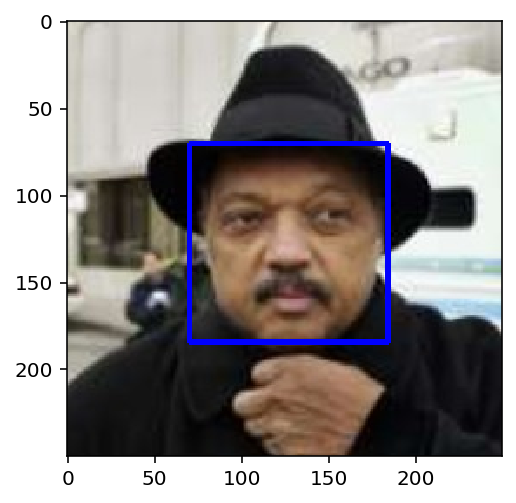

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# image에서 얼굴 detection 하는 XML 파일 적용
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# 색 (BGR) image 읽기 (경로를 받아서 image 읽기)
img = cv2.imread(human_files[0])
# BGR image 흑백 전환 (openCV haarcascade 적용을 위한 흑백 전환)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 읽은 흑백 image에 얼굴탐지 알고리즘 적용
faces = face_cascade.detectMultiScale(gray)

# image에서 인식한 얼굴의 수를 확인
print('Number of faces detected:', len(faces))

# 인식한 얼굴에 사각 영역 표시하기
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# 표출을 위해서 BGR image를 RGB로 전환하기
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()


* 일반적으로 얼굴인식 알고리즘은 흑백으로 image를 전환하여 수행합니다
* `detectMultiScale`함수는 `face_cascade`으로 받아온 얼굴인식 프로그램을 실행하며, 흑백 이미지를 input으로 받습니다

* 위에서 `faces`는 인식한 얼굴을 기록한 numpy array입니다
  * numpy array의 row는 각 인식한 얼굴의 좌표를 저장합니다
  * 첫 2개 좌표는 (위에서 `x`와 `y`로 받은) 인식한 얼굴의 왼쪽 위 꼭지점의 좌표를
  * 뒤 2개 좌표는 (위에서 `w`와 `h`로 받은) 인식한 얼굴의 넓이와 높이를 말해줍니다 (pixel 수)
  
  
## **[문제 1]** 얼굴 인식 모듈

위에서 사용된 코드로 직접 얼굴 인식 모듈을 구현하세요.

* function name : `face_detector`
  * input: `img_path`
    * `img_path` : image가 저장되어 있는 경로 string
  * output: `boolean`
    * 사람 얼굴이 인식되었으면 `True` 
    * 사람 얼굴이 인식되지 않았으면 `False` 
    * [힌트] `face_cascade`의 결과 값의 길이가 0보다 큰지 확인하는 함수 작성


**[답 작성]**

In [7]:
# 문제 1 답 작성
def face_detector(img_path):
    ### 답 작성 부분 ###
    #detected를 False로 초기화
    detected=False
    #경로 받아서 이미지 읽어오기
    img=cv2.imread(img_path)
    #컬러를 이미지 탐지위해 흑백으로 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #얼굴 탐지 알고리즘 적용
    faces = face_cascade.detectMultiScale(gray)
    

    #0보다 크면 detected는 True 이외에는 False 값 반환
    if len(faces) > 0:
        detected=True
    else:
        detected
    return detected

### 얼굴 인식 모듈 성능평가

아래 코드 셀에 위에서 작성한 `face_detector` 함수의 성능을 확인해보세요 (결과는 아래 코드에서 출력합니다).

1. 100개의 `human_files` image 중에서 사람얼굴을 인식한 경우는 몇% 인가요? 
2. 100개의 `dog_files` image 중에서 (잘못하여) 사람얼굴을 인식한 경우는 몇% 인가요?

물론 이상적으로는 human images에 대해서는 100% 와 dog images는 0%의 사람얼굴 인식 의 결과가 나와야 하지만, 본 알고리즘은 완벽하지 않다는 것을 확인할 수 있습니다.

아래 셀에서 각 항목별로 100개의 image를 추출하여 `human_files_short`와 `dog_files_short`로 준비하였습니다

In [8]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

## human_files_short와 dog_files_short에 face_detector algorithm의 성능을 확인하세요
human_file = [face_detector(file) for file in human_files_short]
dog_file = [face_detector(file) for file in dog_files_short]

human_percentage = human_file.count(True) / len(human_file) * 100
human_in_dog_percentange = dog_file.count(True) / len(dog_file) * 100

##################################################

print("human file에 대한 사람 얼굴인식률: {}%".format(human_percentage))
print("dog file에 대한 사람 얼굴 인식률: {}%".format(human_in_dog_percentange))

human file에 대한 사람 얼굴인식률: 99.0%
dog file에 대한 사람 얼굴 인식률: 11.0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

위에서 사람 얼굴 인식 모듈은 OpenCV를 통해서 구현했습니다.
이번에는 dog detection 관련 모듈을 pytorch에서 [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html)가져와서 구현하도록 합니다. Imagenet을 위한 구현 모델은 1000개의 class 분류를 하는데 있어서 dog의 종의 분류하는 class가 여러개 포함되어 있습니다!

### Pre-trained VGG-16 Model 불러오기

* 아래 코드는 [ImageNet](http://www.image-net.org/)의 방대한 자료를 통해서 미리 학습된 VGG-16 model 모델을 가져옵니다
* ImageNet에서 분류하는 [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)를 링크에서 확인해보세요  

In [9]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

* 아래 셀을 통해서 VGG16의 구조를 확인합니다.

In [10]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## **[문제 2]**  VGG-16 Model 에 대한 설명

위 VGG16 모델을 보고, 모델에 대해서 설명하세요 (아래 사항 중심으로). 
- input과 output의 구성과 관계 
- 최종 layer에서 출력하는 output의 의미
- output을 통해서 최종 class로 분류하는 방법 설명 [0~999]

**[답 작성]** 
(더블클릭해서 수정하세요.)
### 1. input과 output의 구성과 관계
#### 이미지는 3 채널의 형태, 즉 컬러의 형태로 받게된다. 따라서 conv 메트릭스가 받는 채널은 3이고, 이후 출력 결과와 같이 input은 224x224x3의 이미지를 받고 그 이미지를 64개의 3*3의 필터 형태로 conv 시켜준다.
#### 패딩 값과 stride 값은 1로 주어서, 총 224x224x64의 feature가 생성된다. 마찬가지로 두 번째 레이어에서도 다음과 같이 feature을 생성한 후, MaxPooling2d를 설정해 줌으로써, 채널에 대한 연산량을 줄여준다. 따라서 112*112*64의 feature가 생성되게 된다. 
#### 이 후 레이어 들은 생략 하고, 최종적으로 25088개의 뉴런이 생기고, training 할 시에 첫 번째 레이어와 fc가 되어서 dropout이 적용 된다. 이후, activation function은 ReLU를 사용하여 일정 값 이상이 되면 활성화가 되는 작업을 수행해준다. 따라서 Conv 가 시행된 후에 값들을 갱신하기 위해 ReLU를 사용해준다.

### 2. 최종 layer에서 출력하는 output의 의미
#### 최종 레이어에서의 output 값은 1000이다. 따라서 1000개의 클래스로 분류되는 네트워크이다.

### 3. output을 통해서 최종 class로 분류하는 방법 설명 [0~999]
#### 여기서 1000개의 클래스를 구분하려면 위와 같이 output 값을 1000개의 뉴런으로 설정해 주면 된다.


## **[문제 3]** Pre-trained Model(VGG-16)을 활용한 개 품종 분류기

아래 셀에서 다음을 구현하세요:

* function name : `VGG16_predict`
    * input : `img_path`
        * `img_path` : image가 저장되어 있는 경로 string
        * 예) `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`

    * output : `index`
        * VGG16 모델을 통해서 분류된 ImageNet class index
        * VGG16의 분류 인덱스는 0에서 999 사이 입니다

* gpu를 활용하세요.

* VGG16 모델의 최종 출력 layer이 `linear` layer이라는 것을 인지해주세요 (logit 출력, 즉 softmax activation이 없는 채로 출력합니다!)

* 입력 image를 244x244 크기로 하세요 (transform, Resize)

* [중요] 아래 제공하는 `image_loader` 함수가 유용할 것입니다

* [힌트] 그 아래 `VGG16` 출력값 확인 과정을 나열하였습니다

### Image loader 함수 제공

* img_path에서 img를 어떻게 받는지 살펴보세요. 유용할 수 있습니다

본 문제에서는 VGG-16 모델을 개 인식 모듈의 네트워크로 사용하지만, 다른 Pre-trained 네트워크(예: [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 등)를 자유롭게 사용하여 프로젝트를 진행할 수 있습니다. 만약 다른 Pre-trained 네트워크로 개 인식 모듈을 구현하기로 한 경우 아래 vgg16에 해당하는 설명을 본인이 선택한 모델로 변경하여 설명하시면 됩니다

In [11]:
def image_loader(img_path, transform, use_cuda):
    image = Image.open(img_path).convert('RGB')
    img = transform(image)[:3,:,:].unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    return img

__[사용법]__

In [12]:
imgFile = 'images/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'

transform = transforms.Compose([
                    transforms.Resize(size=(244, 244)),
                    transforms.ToTensor()])

img = image_loader(imgFile, transform, use_cuda)
img

tensor([[[[0.3216, 0.1490, 0.3098,  ..., 0.1843, 0.1216, 0.2078],
          [0.3608, 0.2431, 0.1961,  ..., 0.1020, 0.1137, 0.2353],
          [0.3804, 0.3961, 0.2549,  ..., 0.0980, 0.1608, 0.2588],
          ...,
          [0.9059, 0.8902, 0.8588,  ..., 0.8941, 0.8745, 0.8549],
          [0.9294, 0.9059, 0.8667,  ..., 0.8392, 0.8863, 0.8706],
          [0.9255, 0.9020, 0.8784,  ..., 0.7569, 0.8431, 0.8275]],

         [[0.3647, 0.1961, 0.3608,  ..., 0.2235, 0.1294, 0.1961],
          [0.4118, 0.2980, 0.2510,  ..., 0.1451, 0.1294, 0.2314],
          [0.4392, 0.4588, 0.3216,  ..., 0.1451, 0.1804, 0.2549],
          ...,
          [0.7373, 0.7216, 0.7059,  ..., 0.7961, 0.7843, 0.7725],
          [0.7569, 0.7373, 0.7137,  ..., 0.7412, 0.8039, 0.7922],
          [0.7529, 0.7333, 0.7216,  ..., 0.6627, 0.7569, 0.7490]],

         [[0.2039, 0.0824, 0.2196,  ..., 0.1961, 0.0941, 0.1451],
          [0.2627, 0.1529, 0.1098,  ..., 0.1137, 0.0863, 0.1725],
          [0.3020, 0.3176, 0.1725,  ..., 0

__[유용한 연습코드]__  VGG16(img)의 출력값 확인 과정

In [13]:
logit = VGG16(img)

In [14]:
logit.shape

torch.Size([1, 1000])

In [15]:
torch.max(logit,1)

torch.return_types.max(
values=tensor([16.5328], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([252], device='cuda:0'))

In [16]:
torch.max(logit,1)[1]

tensor([252], device='cuda:0')

In [17]:
torch.max(logit,1)[1].item()

252

In [18]:
index = torch.max(logit, 1)[1].item()
index

252

VGG16_predict를 완성하세요

In [19]:
# 문제 3 답 작성
def VGG16_predict(img_path):
    ### 답 작성 부분 ###

    vgg_predict=VGG16(image_loader(img_path,transform, True))
    
    return torch.max(vgg_predict,1)[1].item()

아래의 코드를 통해 위에서 구현한 함수를 테스트해 보세요.

예제 출력
```
Index: 252
```

In [20]:
imgFile = 'images/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'

print("Index:", VGG16_predict(imgFile))

Index: 252


## **[문제 4]** 개 인식 모듈 제작

__Dog detector (개 인식)__<br>
위 VGG-16 에서 분류하는 [class](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)를 살펴보면<br>
151 - 268번은 `'Chihuahua'`에서 `'Mexican hairless'`까지 개의 종을 분류하는 인덱스라는 것을 알 수 있습니다.<br>
이외에 인덱스는 다양한 다른 종을 분류합니다.<br>
> 예를 들어서 1번은 '금붕어' 2번은 '백상아리' 등이죠.<br>

위 분류는 ImageNet에 분류 기준이어서 Vgg-16 뿐 아니라 Resnet등도 모두 같은 분류 기준을 사용합니다.

따라서, dog detector 모듈의 경우<br>
VGG16을 통해서 분류(`VGG16_predict(img_path)`)된 우리의 image가 151에서 268번 사이에 들어가는지<br>
`True`와 `False`를 알려주는 간단한 모듈을 만들면 됩니다.<br>

위의 방법이 말이 되는지 생각해보세요, 다른 방법이 있다면 다른 방법으로 구현해도 좋습니다.

* function name : `dog_detector`
    * input : `img_path`
        * `img_path` : image가 저장되어 있는 경로 string
        
    * output : `boolean`
        * 개가 인식되면 `True`
        * 아니면 `False`

**[답 작성]**

In [21]:
# 문제 4 답 작성
def dog_detector(img_path):
    ### 답 작성 부분 ###

    #위에 썻던 VGG16_predict 활용
    vgg_predict=VGG16_predict(img_path)
    
    detected=False
    #151 - 268번은 'Chihuahua'에서 'Mexican hairless'까지 개의 종을 분류하는 인덱스라는 것을 알 수 있습니다.
    if (vgg_predict >= 151) and (vgg_predict <=268):
        detected=True
    else:
        detected
        
    return detected

### 개 인식 모듈 평가

아래 코드 셀에 위에서 작성한 `dog_detector` 함수의 성능을 확인해보세요.

- `human_files_short` image 중에서 (잘못하여) 개를 인식한 경우는 몇% 인가요?
- `dog_files_short` image 중에서 개를 인식한 경우는 몇% 인가요?

output 예제
```
human file에 대한 개인식률: 1.0%
dog file에 대한 개인식률: 95.0%
```

In [22]:
human_dogs = [dog_detector(i) for i in human_files_short]
dogs = [dog_detector(j) for j in dog_files_short]

human = str(float(sum(human_dogs)) / len(human_files_short) * 100)
dog = str(float(sum(dogs)) / len(dog_files_short) * 100)

##################################################

print("human file에 대한 개인식률: {}%".format(human))
print("dog file에 대한 개인식률: {}%".format(dog))

human file에 대한 개인식률: 0.0%
dog file에 대한 개인식률: 100.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

앞의 Step1, 2를 통해 이미지에서 사람과 개를 인식하는 모듈을 구현하였습니다.<br>
이번 Step에서는 개의 이미지에서 개의 종을 예측할 수 있는 모듈을 구현할 것입니다.<br>
따라서, 개 품종을 분류하는 CNN을 만들고, 이 과정은 네트워크를 처음부터 각자 코드로 작성하여 네트워크를 구성하도록 합니다.<br>
최종 테스트 정확도는 10 % 이상을 권장합니다.<br>
(해당 프로젝트의 Step 4 에서는 Pre-trianed 네트워크를 이용해 transfer learning을 통하여 정확도를 크게 향상시키는 CNN도 만들 것입니다.)

참고로, 개 이미지에서 개에 품종을 예측하는 좋은 성능의 네트워크를 처음부터 끝까지 구성하는 일은 쉽지 않습니다 (코딩이 어려운 것이 아니라, 네트워크를 학습시키기 쉽지 않습니다).<br>
심지어 사람조차도 Brittany와 Welsh Springer Spaniel를 구별하는데 어렵기 때문이죠.

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://drive.google.com/uc?export=view&id=1EFcAIA_vjVdQZQ3C6RaHi0FbrP5VusN7" width="100"> | <img src="https://drive.google.com/uc?export=view&id=1EXu-8pgzBxQoRu42CdZcmOYcZU1k1ysq" width="200">

클래스 간 차이가 별로 없는 아래와 같은 예도 있습니다 (예 : Curly-Coated Retrievers 및 American Water Spaniels).

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://drive.google.com/uc?export=view&id=15VG_cj-L-HN_ysipi-Q4s_4j5dcqbuyf" width="200"> | <img src="https://drive.google.com/uc?export=view&id=1fcLLK6x2_bZN8_17O9SDYBE80jIA-4Qp" width="200">


어려움에 대한 예로, 모두 labradors 품종인데 yellow, chocolate, 및 black 으로 다양한 털 색이 있는 종도 있습니다. 모두 같은 품종으로 예측해야하는 어려운 문제죠.

Yellow Labrador | Chocolate Labrador | Black Labrador
- | - | -
<img src="https://drive.google.com/uc?export=view&id=171DW8SsBtFvjy-TQqyZOpne1y3_6g-lf" width="150"> | <img src="https://drive.google.com/uc?export=view&id=1bBvcQTyeC6umNeX3jpqXes52eqXGFAmm" width="240"> | <img src="https://drive.google.com/uc?export=view&id=18er4UGbiTtuDoHwjNrv8AEqLeJafnkLg" width="220">



## **[문제 5]** Dataset 에 대한 Data Loaders 구성

아래의 코드를 사용하여 개 이미지의 training, validation, 및 test data set (각각 `images/dogImages/train`, `images/dogImages/valid`, `images/dogImages/test`에 위치)에 대해 각 [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)를 작성하십시오.<br>
수업에서 참고했던 [torchvision datasets](http://pytorch.org/docs/stable/torchvision/datasets.html)를 참고할 수 있습니다.<br>
training/validation 성능을 개선하기 위해서 다양한 [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)을 활용하실 수 있습니다. <br>

__[코드 구성]__
- - -
* MEANS, DEVIATIONS
    * transform에서 정규화에 사용할 평균 및 표준편차 값 설정
    * MEANS: RGB 평균 
    * DEVIATIONS: RGB 표준편차 
- - -
* 데이터 위치
    * train_path : `images/dogImages/train`
    * valid_path : `images/dogImages/valid`
    * test_path : `images/dogImages/test`
- - -
* Transform
    * `train_transform` : train 에 사용될 Transform
    * `test_transform` : validation, test 에 사용될 Transform
- - -
* ImageFolder
    * `training` : training에 사용될 이미지 폴더의 데이터 셋
    * `validation` : validation에 사용될 이미지 폴더의 데이터 셋
    * `testing` : testing에 사용될 이미지 폴더의 데이터 셋
- - -
* DataLoader & DataLoader Dictionary
    * `train_batches` : training 데이터 셋의 데이터 로더
    * `valid_batches` : validation 데이터 셋의 데이터 로더
    * `test_batches` : testing 데이터 셋의 데이터 로더



**[답 작성]**

In [23]:
newpath = Path("images/dogImages").expanduser()
train_path = str(newpath.joinpath("train"))
valid_path = str(newpath.joinpath("valid"))
test_path = str(newpath.joinpath("test"))

IMAGE_SIZE = 224
#베치 사이즈 20으로 설정
batch_size=10
# 문제 5 답 작성
#정규화 값 설정
MEANS = [0.485, 0.456, 0.406]
DEVIATIONS = [0.229, 0.224, 0.225]

# transforms
#train 시킬 transoform 값 설정
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(
        MEANS,
        DEVIATIONS
    )
    #다양성을 부과하기 위해 다음과 같이 변환
])
test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        MEANS,
        DEVIATIONS
    )
    #최종 테스트를 위한 transform 설정
])
#데이터 셋 지정
training = torchvision.datasets.ImageFolder(train_path, transform=train_transform)
validation = torchvision.datasets.ImageFolder(valid_path, transform=train_transform)
testing = torchvision.datasets.ImageFolder(test_path, transform=test_transform)

#DataLoader 값 설정
train_batches = torch.utils.data.DataLoader(training, batch_size=batch_size, shuffle=True)
valid_batches = torch.utils.data.DataLoader(validation, batch_size=batch_size, shuffle=False)
test_batches = torch.utils.data.DataLoader(testing, batch_size=batch_size, shuffle=False)

## **[문제 6]** 데이터 전처리에 대한 설명

위 작성한 코드에 대해서 아래 내용을 설명하세요
- data의 구성과 각 dataloader의 역할을 설명하세요
- `ImageFolder`는 image data와 class label을 어떻게 불러오나요?
- 이미지의 size를 어떻게 조정하나요? (무엇을 이용해 크기를 조정하는지?)
- training을 위한 transform을 사용하였다면, 어떻게 /왜 사용하였나요? (normalization, 변형 등을 자세하게!)

**[답 작성]**
(더블클릭해서 수정하세요.)
### 1. data의 구성과 각 dataloader의 역할을 설명하세요<br>
#### data는 training, validation, testing으로 총 세 가지로 구성되어 있으며, training은 위에 코드와 같이 정해진 에셋들을 가지고 최대한 많은 경우의 수와 다양성을 부여하기 위해, 회전, Resize, RandomRotation, HorizontalFlip 등을 사용하여 다양성을 부가 시켜주었다.
#### validation은 이후에 trainning 에서 오버피팅 및 언더피팅 여부를 확인하기 위해 사용된다.
#### testing는 원본을 유지하며 비교하여 판별을 하는 용도이다.

### 2. ImageFolder는 image data와 class label을 어떻게 불러오나요?<br>
#### ImageFolder 경로에 있는 torchvision.datasets.ImageFolder() 와 같은 함수로 불러오는데, 여기서 위에 있는 train_path, valid_path, test_path와 같이 지정되어 있는 경로를 이용하여, transform 사이즈를 조정하여 최종적으로 iterator를 통해 이미지와 라벨을 불러오게 된다.

### 3. 이미지의 size를 어떻게 조정하나요? (무엇을 이용해 크기를 조정하는지?)<br>
#### 이미지의 사이즈는 transforms.RandomResizedCrop(IMAGE_SIZE) 을 사용하거나 transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))를 통해 사용하하는데, 해당 코드에서는 train 에서는 RandomResizedCrop을, test 에서는 Resize를 사용하였다.

### 4. training을 위한 transform을 사용하였다면, 어떻게 /왜 사용하였나요? (normalization, 변형 등을 자세하게!)<br>
#### 다음과 같이 총 5개를 사용하였으며,     

    transforms.RandomResizedCrop(IMAGE_SIZE),
    
    transforms.RandomHorizontalFlip()
    
    transforms.RandomRotation(30)
    
    transforms.ToTensor()
    
    transforms.Normalize(MEANS, DEVIATIONS)
    
    transforms.RandomVerticalFlip()
#### 각각 순서대로, 크기를 RandomResizedCrop을 통해 IMAGE_SIZE 만큼 크기를 조절해주고, RandomHorizontalFilp을 통해 좌우 반전을 시켜준다. RandomRotaion 30을 통해 랜덤으로 30도 만큼 회전시키고, ToTensor를 통해 이미지를 tensor로 반환시켜준다. 최종적으로 Nomalize를 통해 이미지를 설정된 값으로 정규화를 시켜준다. 위에서 설명했듯이, 데이터에 다양성을 주어 경우의 수를 늘려 훈련시키기 위해 사용했다. transforms.RandomVerticalFlip() 을통해 상하 반전을 시켜줬다.



## **[문제 7]** 개 품종 분류 CNN 구성

개의 품종을 분류하는 CNN을 만드세요.<br>
구조는 학생마다 다르게 구성할 수 있는 부분입니다. 최대한 좋은 성능을 갖도록 구성해보세요<br>
`BREEDS`는 실제 training 시 나와야 하는 classes의 개수입니다.

In [24]:
# 문제 7 답 작성 : define the CNN architecture
torch.cuda.empty_cache()
BREEDS = len(training.classes)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #input 224*224*3
        
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        #Input channels = 3, output channels = 32
        self.conv2 = nn.Conv2d(32, 64, 3, padding = 1)
        #Input channels = 32, output channels = 64
        
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        #Input channels = 64, output channels = 128
        
        self.conv4 = nn.Conv2d(128, 256, 3, padding = 1)
        #Input channels = 128, output channels = 256

        #MaxPool로 사이즈 감소
        self.pool = nn.MaxPool2d(2, 2)
        #오버피팅 방지를 위해 dropout 시켜줌
        self.dropout = nn.Dropout(0.5)
        #BatchNorm2d(32)
        self.conv_bn1 = nn.BatchNorm2d(32)
        #BatchNorm2d(64)
        self.conv_bn2 = nn.BatchNorm2d(64)
        #BatchNorm2d(128)
        self.conv_bn3 = nn.BatchNorm2d(128)
        #BatchNorm2d(256)
        self.conv_bn4 = nn.BatchNorm2d(256)

        #256->128
        self.fc1 = nn.Linear(7*7*256, 7*7*128)
        #128->BREEDS BREEDS의 클래스 개수는 133개
        self.fc2 = nn.Linear(7*7*128, BREEDS)
    
    def forward(self, x):
        #224*224*3
        #각각 max pooling layer를 추가시켜줌
        x = self.pool(F.relu(self.conv1(x)))
        #112*112*32
        x = self.conv_bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        #56*56*64
        x = self.conv_bn2(x)
        x = self.pool(F.relu(self.conv3(x)))
        #28*28*128
        x = self.conv_bn3(x)
        x = self.pool(F.relu(self.conv4(x)))
        #14*14*256
        x = self.conv_bn4(x)
        #7*7*256
        x= self.pool(x)
        
        #vector를 flatten 시켜줌
        x = x.view(-1, 7*7*256) 
        #fc1 layer relu 시켜줌
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        #fc2 layer log_softmax
        x = F.log_softmax(self.fc2(x), dim = 1)
        
        
        return x

In [25]:
#  CNN instance 생성
model_scratch = Net()
print(model_scratch)
# GPU 활용
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (conv_bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12544, out_features=6272, bias=True)
  (fc2): Linear(in_features=6272, out_features=133, bias=True)
)


## **[문제 8]** 설계한 CNN 모델 설명

위의 코드와 같이 네트워크를 구성한 방법과 이유를 각 단계별로 설명하세요. 
아래 내용도 포함하여 설명하시고, 이외에 중요하다고 생각하는 모든 설명을 하시면 됩니다.

* 차원 분석, 채널 수, 커널 크기, linear layer neuron 수
* activation function과 선정 이유
* 특별히, 최종 layer에서 사용한 activation function이 무엇인지 왜 사용하였는지를 상세 설명 
* CNN 모델이 무엇을 입력받고 출력하나요?
  * input과 출력의 관계
  * Output 값의 의미

**[답 작성]** 
(더블클릭해서 수정하세요.)
## 차원 분석, 채널 수, 커널 크기, linear layer neuron 수

#### 차원은 input 의 크기는 224x224x3 으로 pooling과 conv layer 를 통해 112x112x32 -> 56x56x64 -> 28x28x128 -> 14x14x256 -> 7x7x256 이 된다. linear layer neuron은 최종적으로는 Linear를 통해 7x7x256->7x7x128->BREEDS 즉 133개의 뉴런이된다.

#### 채널수는 클 수록 좋지만, 높을 수록 연산량이 늘어나기 때문에, 대안으로 채널을 2배로 올림과 동시에 input size를 절반씩 줄이면서 올리게 하였다. 

#### 커널 크기는 해당 3x3x3 채널필터, stride와 padding 값을 1씩 주었다. pooling을 사용 했기 때문에 input size는 위에 설명했듯 절반으로 줄이기 때문에 건들 필요가 없어 다음과 같이 부여했다.

## activation function과 선정 이유
#### activation function은 relu를 사용 했으며, relu는  0 이상일 경우 해당 값을, 그 외에는 0으로 나타내지만, sigmoid는 특정 값 이상으로 올라가면 1이 되기 때문에 conv를 여러개 사용하고, BREDDS의 개수 즉, 클래스가 많은  CNN 구조에는 relu가 맞다고 생각하여 사용했다. 이 외로 maxpooling과 BatchNorm2d를 사용하였는데 각각 이미지 크기를 줄여 연산을 줄이고, batchNorm2d를 사용하여 배치 정규화를 통해 내부 공변량을 이동을 줄여 학습을 빠르게 진행할 수 있게 하여 사용했다.

## 특별히, 최종 layer에서 사용한 activation function이 무엇인지 왜 사용하였는지를 상세 설명
####  최종 layer 에서는 CNN 구조를 보면 알 수 있듯이 softmax를 사용하였다. sigmoid는 inpu data를 위에 설명 했듯이 특정 값 이상으로 올라가면 1에 수렴하여 반환하고, 반면에 softmax의 결과 값은 0~1사이의 값이 출력되기 때문에 layer의 합은 1로 반환이 된다. 다음과 같이 클래스가 많은 경우에는 합을 1로 반환 해주는 softmax가 맞다고 생각하여 사용하였다.

## CNN 모델이 무엇을 입력받고 출력하나요?
#### input과 출력의 관계 - 3채널(3차원)로 입력을 받아 최종적으로는 1채널 즉 1차원 벡터로 flatten 시켜서 출력하게 된다.
#### Output 값의 의미 - 최종 layer 즉 softmax를 이용하여 반환되는 값이다.

## **[문제 9]** Cost (Loss) Function 과 Optimizer 선택

[loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) 및 [optimizer](http://pytorch.org/docs/stable/optim.html)를 선택하여 코드를 완성하세요. 선택한 cost function을 `criterion_scratch`로 저장하고 optimizer를 아래 `optimizer_scratch`로 저장하세요.

Optimizer와 Cost 함수를 선정하는데 중요하다고 생각하는 내용을 모두 작성합니다. 
아래 내용은 최소한 포함하여 설명합니다.

* Optimizer는 무엇을 선정하였는지 설명
* Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
  * Cost function이 본 문제에 왜 사용하였는가?
  * 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요

**[답 작성]**

In [26]:
import torch.optim as optim
# 문제 9 답 작성: loss function and optimizer
criterion_scratch = nn.NLLLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.004)

**[답 작성]**
(더블클릭해서 수정하세요.)
## Optimizer는 무엇을 선정하였는지 설명
#### Optimizer은 SDG를 사용했다. SDG의 선정 이유는 다른 형식과 달리 일부 데이터만 계산하여 계산속도가 빠르다. 이 외에도 Adam, CrossEntropy를 사용해봤지만 로즈 값이 잘 줄어들지 않아 해당 optimizer를 사용 했다.
## Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
### Cost function이 본 문제에 왜 사용하였는가?
#### LostFunction은 NLLLoss를 사용하였다. 마지막 layer에 LogSoftmax를 추가했으므로 CrossEntropyLoss대신에 NLLLoss를 사용했다.
### 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요
####  모델을 학습할 때는 오류를 최소화하는 방향으로 진행된다. 비용이 최소화되는 곳이 성능이 가장 잘 나오는 부분이며, 가능한 비용이 적은 부분을 찾는 것이 최적화와 일반화 방법이다. 이 cost 혹은 loss가 얼마나 있는지 나타내는 것이 cost(loss) 함수라고 할 수 있다.

<br></br>

## **[문제 10]** 구성한 모델에 대한 Train and Validate 진행

위에서 구성한 모델을 `Train and validate` 하는 모듈을 작성합니다.<br>
[최종 training된 parameter들을](http://pytorch.org/docs/master/notes/serialization.html) 파일 경로 `'models/model_scratch.pt'`에 저장하는 코드를 작성합니다.

`Train and validate` 전에 train 이라는 함수를 작성하여 `Train and validate`를 진행하세요. 가능하면 training되는 과정을 출력하도록 하세요:

예제:
```
Started Training...
Epoch: 1 	Training Loss: 3.317162 	Validation Loss: 4.162958
Validation loss decreased (inf --> 4.162958).  Saving model ...
Epoch: 2 	Training Loss: 2.420140 	Validation Loss: 4.182362
Finished training
<All keys matched successfully>

```


* 코드 전체를 주석으로 설명하세요
* function name : train
    * input : `n_epochs`, `train_batches`, `valid_batches`, `model`, `optimizer`, `criterion`, `use_cuda`, `save_path`
        * `n_epochs` : epochs 의 수 
        * `train_batches` : training data loader
        * `valid_batches` : validation data loader
        * `model` : 구성한 모델
        * `optimizer` : 선택한 optimizer
        * `criterion` : 선택한 loss function
        * `use_cuda` : 쿠다 사용 여부
        * `save_path` : 학습된 모델을 저장할 위치
        
    * output : `model`, `train_losses`, `valid_losses`
        * `model`: 학습이 완료된 모델을 반환
        * `train_losses`, `valid_losses`: epoch 별 training loss와 validation loss (자료형 list)
* 본 과정을 설명하는데 필요하다고 생각하는 추가 `output` 이 있다면, `output` 종류를 더 만드셔도 좋습니다
        

**[답 작성]**

In [27]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# 문제 10 답 작성

def train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    ### 답 작성 부분 ###
    #valid와 train_loss 값 추적 값 초기화
    valid_loss_min = np.Inf
    train_losses, valid_losses = [], []
    #n_epoch만큼 반복
    for n_epochs in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        #model train
        model.train()
        for data, target in train_batches:
            #gpu로 이동시킴
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # optimizer 0으로 초기화    
            optimizer.zero_grad()
            #output을 model(data)로 지정 (forward)
            output = model(data)
            #model에서 나온 output과 target을 가지고  손실값을 계산한다
            loss =  criterion(output, target)
            #역전파를 이용해서 gradient를 업데이트
            loss.backward()
            # optimizer를 통해 Weight 업데이트
            optimizer.step()
            #train_loss에 각각의 값을 더해줌
            train_loss += loss.item()*data.size(0)
        model.eval()

        for data, target in valid_batches:
            #위와 같이 gpu로 이동시켜준다.
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            #forward pass를 시켜줌
            output = model(data)
            #loss 값을 계산해줌
            loss =  criterion(output, target)
            #validation loss의 값을 계산해줌
            valid_loss += loss.item()*data.size(0)

        # 평균 loss 값을 계산해준다
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        

        
        #training loss와 validation loss를 출력시켜줌
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(n_epochs, train_loss, valid_loss))

        #valid_loss값에 따라 model_cifar에 저장시켜줌
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    return model, train_losses, valid_losses

In [28]:
# 아래 코드 줄은 자른 이미지에 대해서 동작하도록 설정하는 부분이며, 주어지는 코드로 사용하세요
# PIL image가 truncated 된 경우 사용할 수 있도록 설정
ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs = 10
model_path = Path("models").expanduser()
save_path = model_path.joinpath("model_scratch.pt")

# model_scratch 학습하기
model_scratch, train_losses, valid_losses = train(epochs, train_batches, valid_batches, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, save_path)

# validation이 가장 좋았던 모델 parameter 불러와서 저장하기
model_scratch.load_state_dict(torch.load(save_path))



Epoch: 1 	Training Loss: 4.792884 	Validation Loss: 4.593778
Validation loss decreased (inf --> 4.593778).  Saving model ...
Epoch: 2 	Training Loss: 4.550600 	Validation Loss: 4.453202
Validation loss decreased (4.593778 --> 4.453202).  Saving model ...
Epoch: 3 	Training Loss: 4.436791 	Validation Loss: 4.385340
Validation loss decreased (4.453202 --> 4.385340).  Saving model ...
Epoch: 4 	Training Loss: 4.349175 	Validation Loss: 4.450686
Epoch: 5 	Training Loss: 4.287432 	Validation Loss: 4.332042
Validation loss decreased (4.385340 --> 4.332042).  Saving model ...
Epoch: 6 	Training Loss: 4.226764 	Validation Loss: 4.237632
Validation loss decreased (4.332042 --> 4.237632).  Saving model ...
Epoch: 7 	Training Loss: 4.179513 	Validation Loss: 4.235665
Validation loss decreased (4.237632 --> 4.235665).  Saving model ...
Epoch: 8 	Training Loss: 4.111440 	Validation Loss: 4.144089
Validation loss decreased (4.235665 --> 4.144089).  Saving model ...
Epoch: 9 	Training Loss: 4.068356 

<All keys matched successfully>

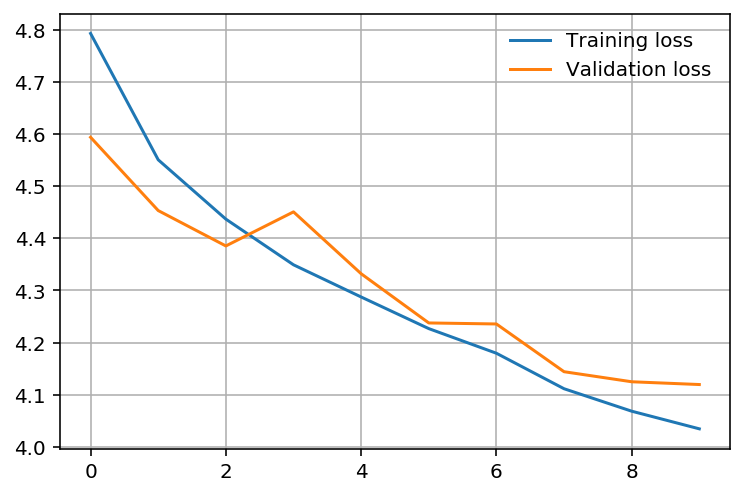

In [29]:
# 성능 분석에 활용하기 위한 결과 plot 하는 방법
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.grid(True)


## **[문제 11]** CNN model training/validation 분석

* 위에서 수행한 training + validation 과정을 설명하세요
* validation 과정을 분석하고, 학습을 개선시킨 방법을 validation 결과와 함께 분석하세요

  * tranining loss와 validation loss 그래프를 통해서 분석
  * hyper-parameter, model을 변경하면서 성능 개선한 과정을 최대한 설명하세요
  * dropout, regularization, normalizationearly stopping 등 사용한 방법 설명
  * overfitting, underfitting 분석

**[답 작성]**
(더블클릭해서 수정하세요.)
## 위에서 수행한 training + validation 과정을 설명하세요
#### optimizer.zero_grad()를 통해 초기화를 시키고, CNN에서 정의한 conv layer 와 fc layer를 수행하여 ouput을 통해 loss 값을 구한 후, 역전파를 이용하여 gradient를 업데이트 시켜준다. 이후 optimizer를 통해 weight를 업데이트 시켜주게 된다. valid 또한 train과 똑같이 진행되며 valid loss 값이 이전보다 줄었으면 저장을 한 뒤, 다음 epoch으로 넘어가게 된다.

## hyper-parameter, model을 변경하면서 성능 개선한 과정을 최대한 설명하세요
#### loss CNN을 구성한 이후, loss 값이 batch_size 및 여러 다양성을 넣어줬음에도 불구하고 4.6에서 더 이상 떨어지지 않아 방법을 찾아 보던 중 batchnorm2d 라는 함수를 발견하여 해당 CNN에 적용 시켰더니 정확도가 2%에서 8%정도까지 상승했다. 해당 작업을 할때는 스크린샷을 찍어두지 않아 자료는 없지만, 그 이후에 batchsize 및 여러가지를 변화를 주어 다음과 같은 결과들이 나왔다.
### 해당 값은 배치사이즈를 10으로 준 결과 값이다.
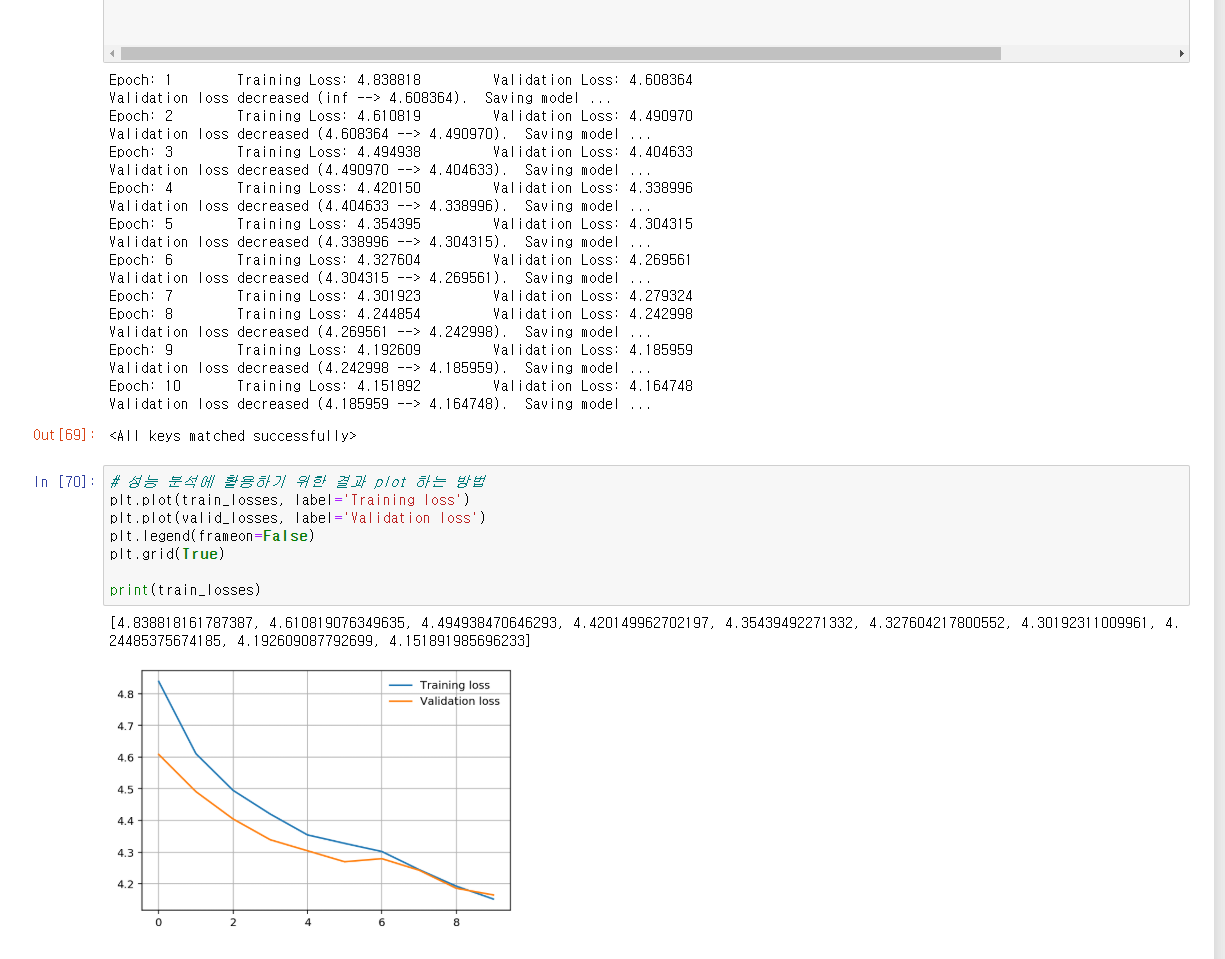
### 다음은 배치사이즈를 16으로 준 결과 값이다.
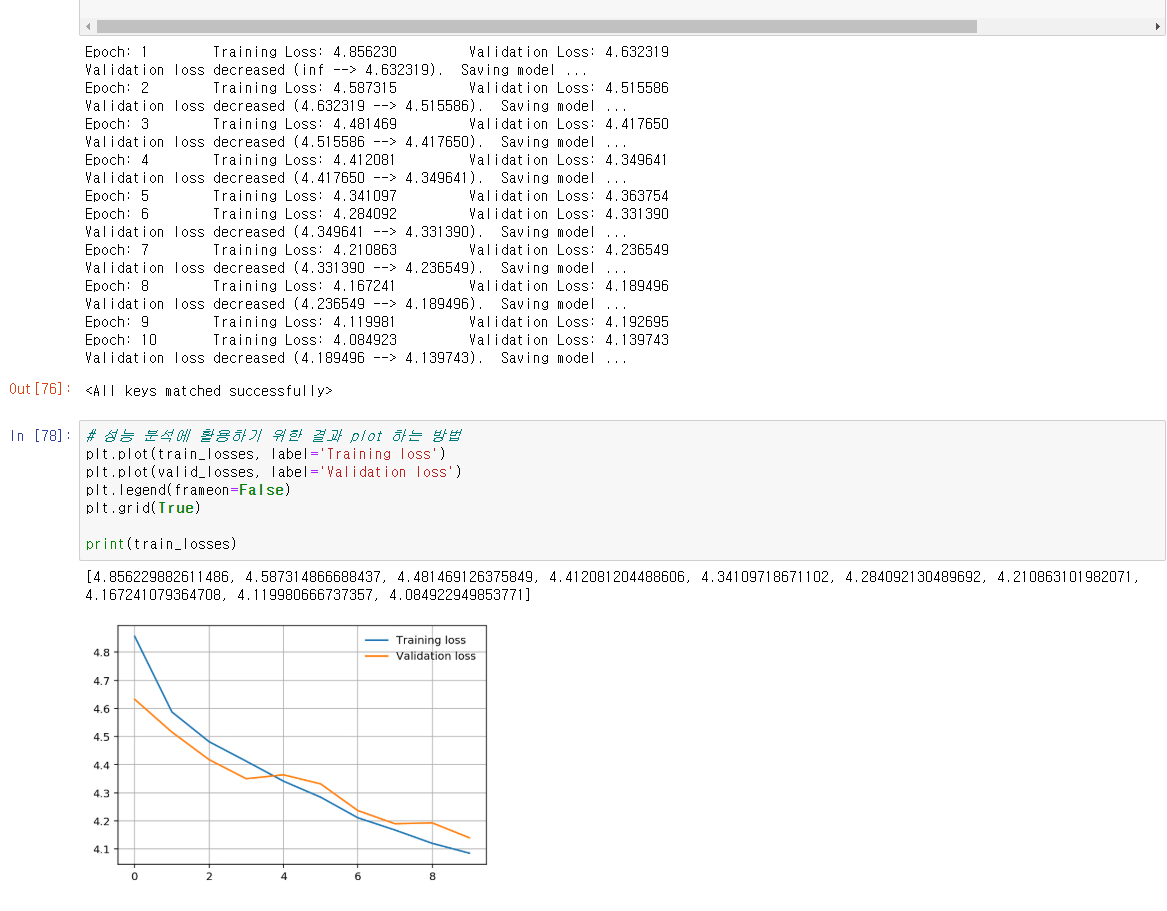
### 다음은 배치사이즈를 16에 Convolutional Layer를 한 개 더 추가했을때의 결과이다.
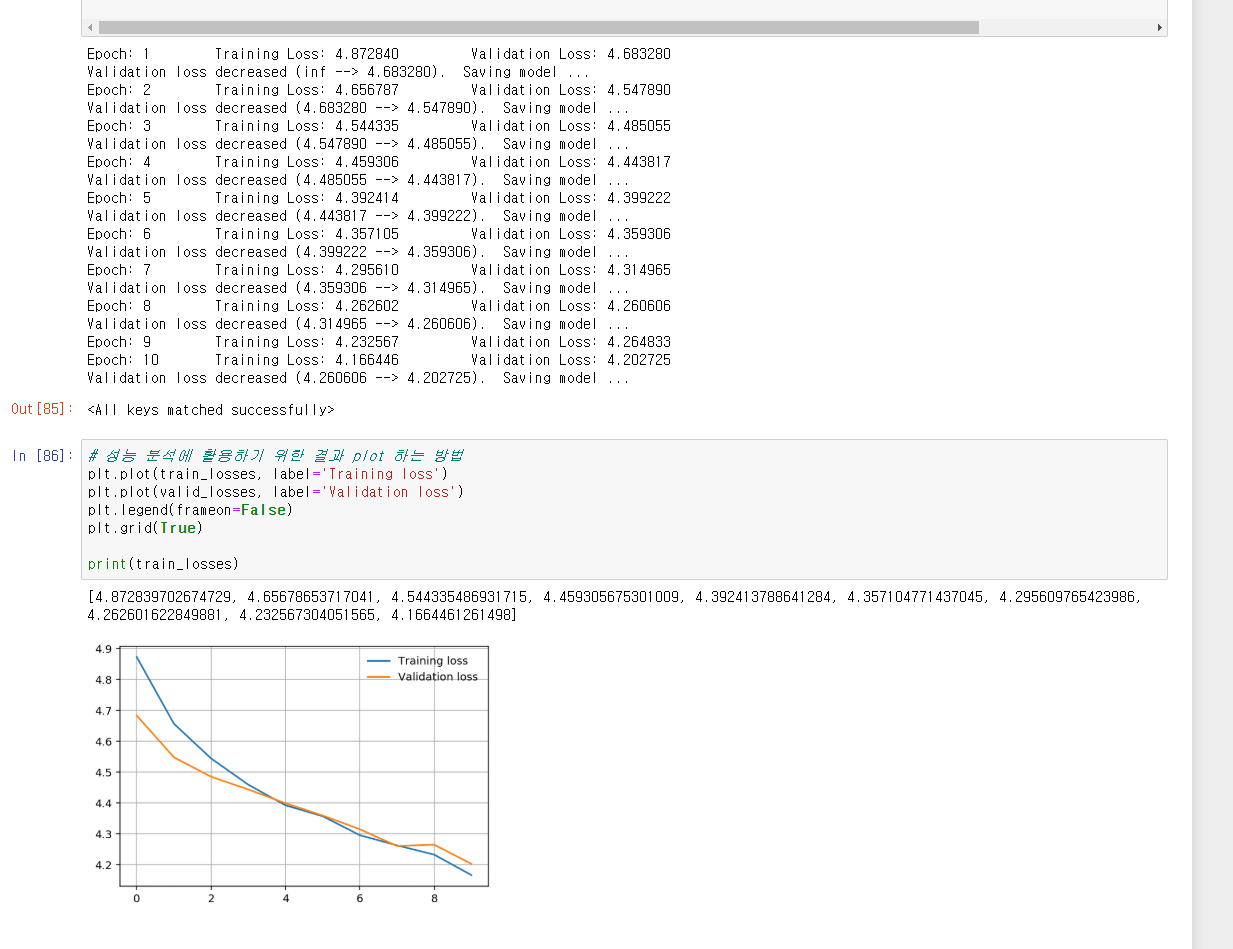
### 다음은 배치사이즈를 18을 준 결과이다.
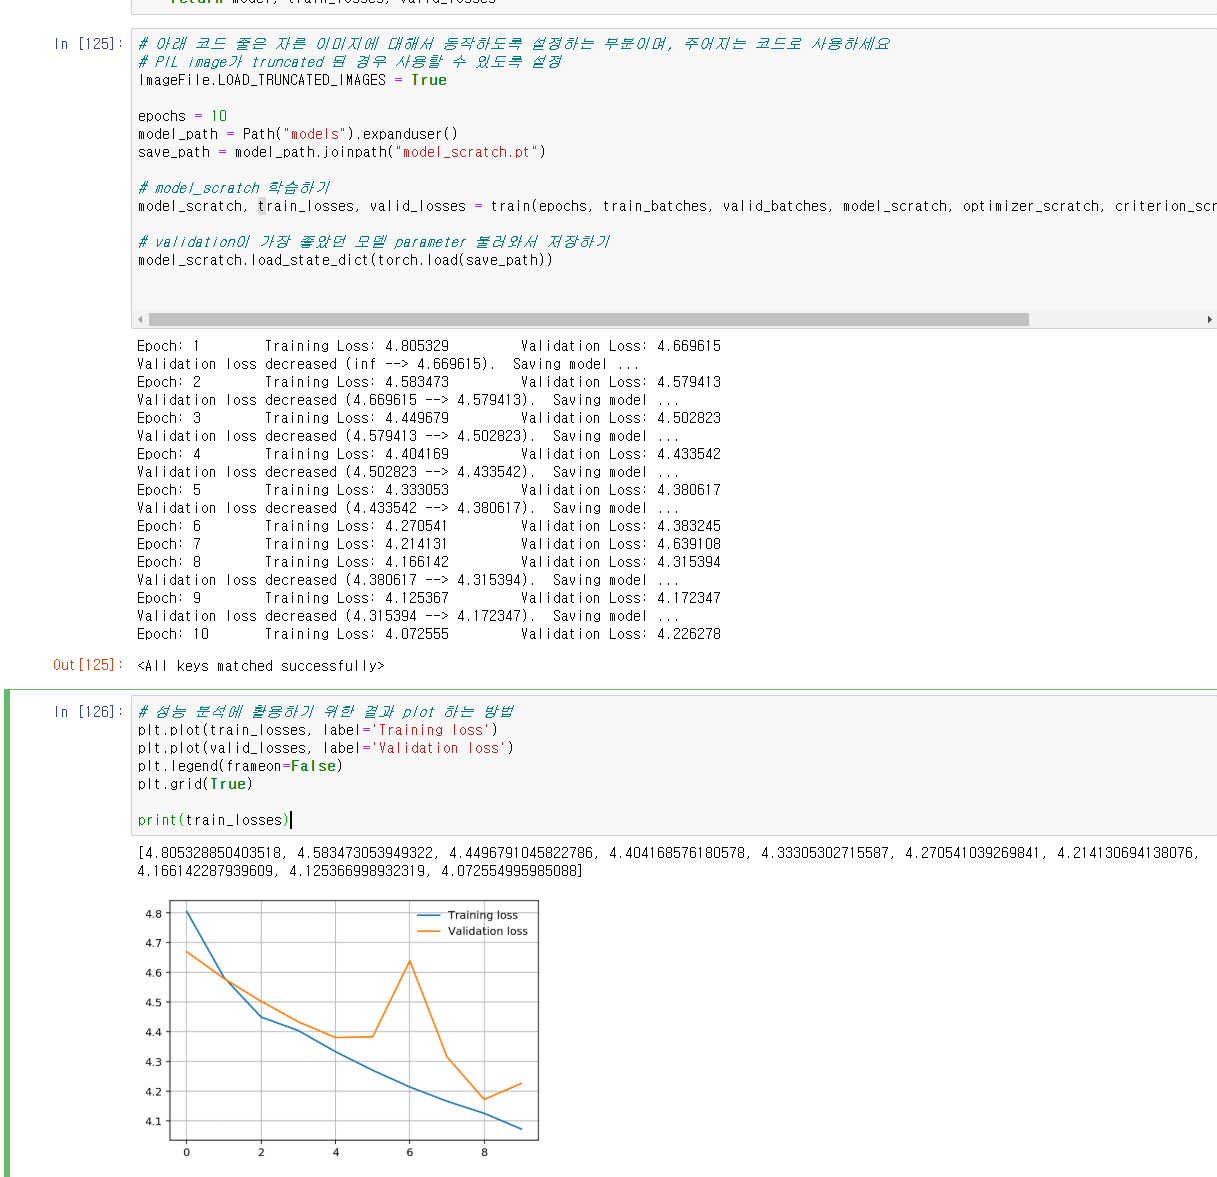
### 다음은 배치사이즈를 20을 준 결과이다.
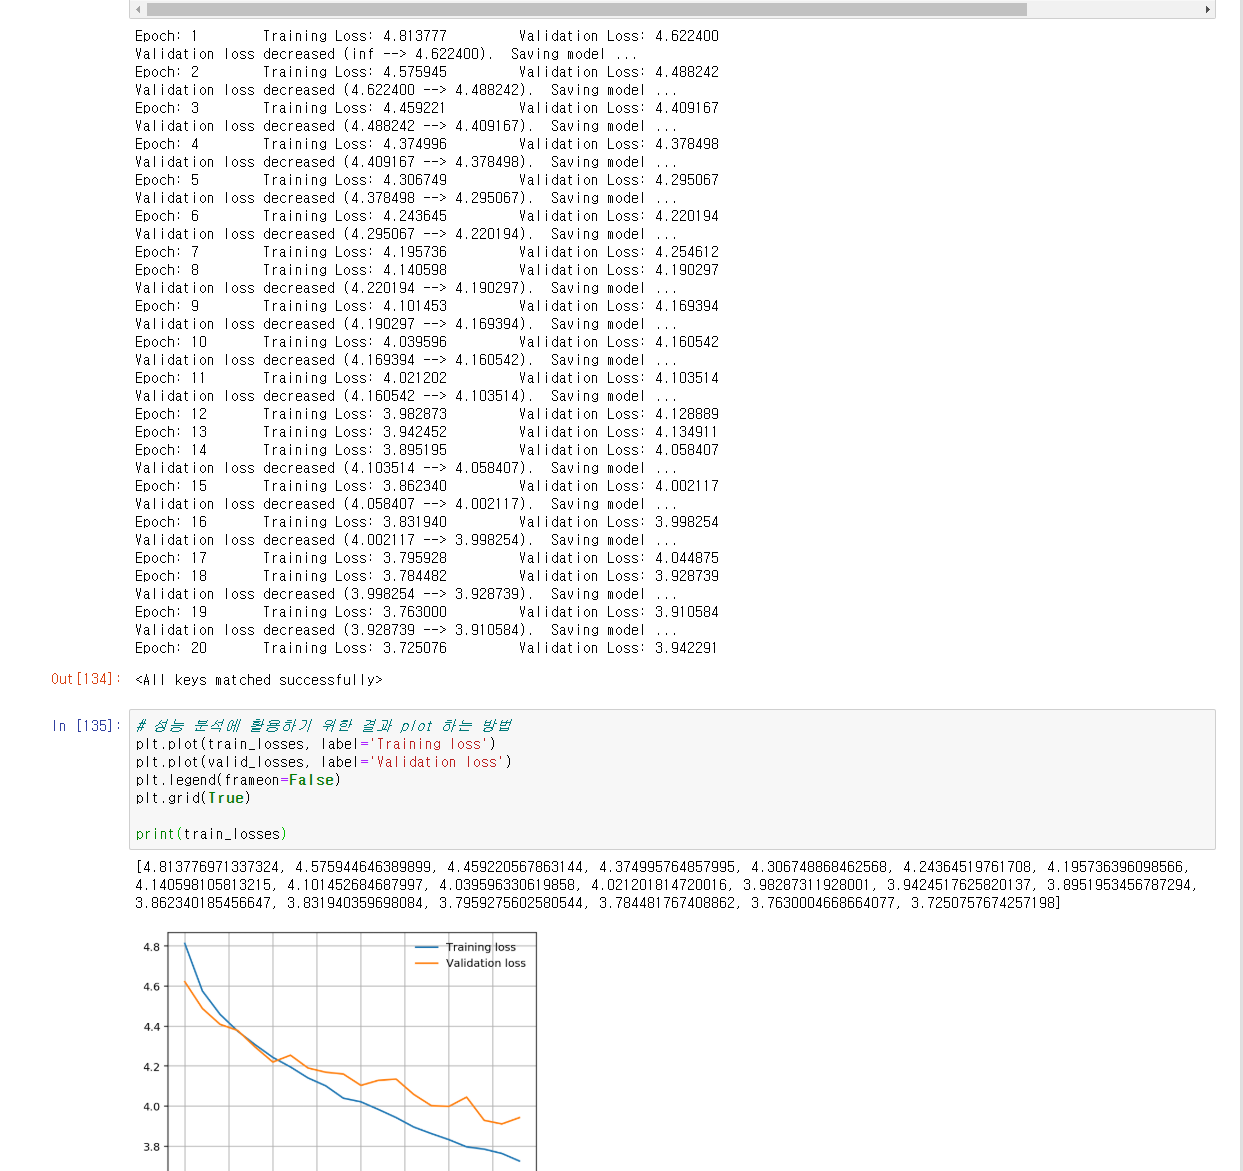
#### 배치사이즈를 20을 줬을 때 정확도 및 Valid loss 값이 가장 적게 나와서 해당 배치사이즈를  채택을 했고, 이후에는 다양성을 더 주기위해 RandomVerticalFlip을 추가하여 상하 반전도 주었더니 정확도가 14%까지 오르게되었다. 이후 오버피팅이 일어나 dropout을 남발했던 것을 몇개 지워줬더니, 최종적으로 위에 있는 결과 값과 같은 그래프가 나오게 되었다.


## overfitting, underfitting 분석
#### 해당 그래프는 overfitting이 자주 일어나서 여러 학습할 다양성과, dropout을 썻다가 오히려 loss 값이 정체해 있어 dropout을 쓴 것을 줄여준 후, 최대한의 다양성을 주어 다음과 같은 그래프 결과가 나왔다. 또한 epoch 10까지는 문제 없이가다가 10 이후부터, overfitting이 일어난다. 따라서 10 이상 돌리는 것은 시간대비상 효율성이 부족하지만, 20번을 돌린 결과 loss 값이 3.9까지 떨어져 20번까지 한 것을 채택하였다.


## **[문제 12]** 학습한 모델에 대한 Test 과정

위에서 학습한 모델을 이용하여 개 이미지의 test dataset에서의 예측결과를 확인하세요.<br>
test loss 와 test accuracy를 계산하고 출력하세요.<br>
test accuracy를 확인합니다 (9%이상 목표로 해보세요).<br>

`test` 전에 test라는 함수를 작성하여 `test`를 진행하세요.
* test 결과가 출력되도록 작성합니다

* function name : test
    * input : `test_batches`, `model`, `criterion`, `use_cuda`
        * `test_batches` : test dataset loader
        * `model` : 학습된 모델
        * `criterion` : 선택한 loss function
        * `use_cuda` : 쿠다 사용 여부
        
    * output : 없음.


Test 모듈 실행 결과 예시
```
Test Loss: 3.924572


Test Accuracy: 11% (98/836)
```

In [30]:
# 문제 12 답 작성
def test(test_loader, model, criterion, use_cuda):
    ### 답 작성 부분 ###
    
    # track test loss
    test_loss = 0.0
    #class가 만큼 즉 BREEDS 만큼 돌려줌
    class_correct = list(0. for i in range(BREEDS))
    class_total = list(0. for i in range(BREEDS))
    torch.cuda.empty_cache()    
    model.eval()
    # 모델 테스트 시작
    for data, target in test_loader:
        # GPU로 데이터 이동
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass 를 수행
        output = model(data)
        #batch loss 값을 계산
        loss = criterion(output, target)
        #loss 값을 최신화 시켜줌
        test_loss += loss.item()*data.size(0)
        #max output의 값을 prediction으로 저장
        _, pred = torch.max(output, 1)    
        # label과 prediction 비교해서 tensor에 저장
        correct_tensor = pred.eq(target.data.view_as(pred))
        #gpu에 값이 있으면 cpu로 옮기고 numpy로 바꿈
        correct = np.squeeze(correct_tensor.numpy()) if not use_cuda else np.squeeze(correct_tensor.cpu().numpy())
        #batch_size만큼 for 문을 돌린후 정확도 계산
        for i in range(len(target.data)):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
            
    #test_loss의 평균 값을 내어줌
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    
    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))
    torch.cuda.empty_cache()

In [31]:
# call test function    
test(test_batches, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.987919


Test Accuracy (Overall): 10% (85/836)


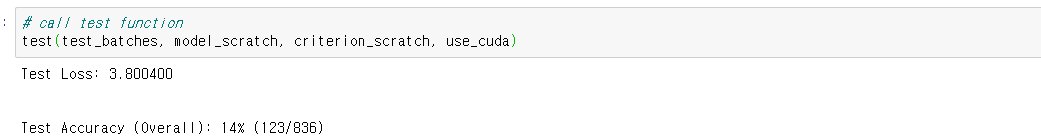

---
<a id='step4'></a>
# Step 4: Transfer learning을 활용한 개 품종 분류 네트워크 구성

이제 transfer learning을 사용하여 이미지에서 개 품종을 식별 할 수있는 CNN을 만듭니다.<br>
CNN은 test set에서 60 % 이상의 정확도를 권장합니다.


## **[문제 13]** 개 품종 분류 CNN 구성

[transfer learning](https://pytorch.org/docs/0.3.0/torchvision/models.html#torchvision-models)을 사용하여 개 품종을 분류하는 CNN을 만들도록 하겠습니다.<br>
미리 학습된 모델을 사용하여 학습 시간을 줄이고 정확도를 높이며, 출력의 분류 layer들을 우리 목적에 맞게 변경하도록 합니다. (Transfer learning 실습 참고하세요).<br>
* Pretrained 된 모델을 변수 `model_transfer`로 저장하십시오.<br>
* `Torchvision`에서 Imagenet으로 학습된 모델을 위 링크에서 찾아서 다양하게 적용해보시고, 가장 적합하다고 판단되는 것을 선정해서 변경하시면 됩니다.
* 모델별로 다르겠지만, classification을 위한 Fully connected layer (FCN) 부분을 우리 분류 목적에 맞게 변경하기 위해서 FCN 부분의 입력 길이를 파악학고, 최종단의 출력을 우리 목적에 맞게 변경하시면 됩니다

* 우리 분류 개수는 위 `BREEDS`라는 자료에 저장되어 있습니다
* `pretrained=True` 설정을 잊지 마세요

In [41]:
BREEDS

133

**[답 작성]**

In [42]:
# 문제 13 답 작성 : Pretrained 모델을 불러오세요.
model_transfer = torch.hub.load('pytorch/vision:v0.6.0', 'densenet161', pretrained=True)

Using cache found in C:\Users\USER/.cache\torch\hub\pytorch_vision_v0.6.0


불러온 모델의 구조를 확인합니다

In [43]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Transfer learning을 위해서 133개의 class로 분류하는 FCN을 불러온 model_transfer 에 맞게 적용 하세요.

* Feature extraction (CNN) 부분은 재학습하지 않습니다 (parameter 동결)
* 새로 구성한 FCN 부분을 재 학습 할 수 있도록 gradient 연산을 살려둡니다 

**[답 작성]**

In [60]:
## 문제 13 코드 답 작성
### 답 작성 부분 ###
for param in model_transfer.parameters():
    param.requires_grad = False
model_transfer.classifier = nn.Linear(2208, BREEDS)
if use_cuda:
    model_transfer = model_transfer.cuda()

## **[문제 14]** 위의 네트워크를 구성한 이유에 대한 설명

Transfer learning을 위해서 설정한 네트워크의 구조를 설명하고, 아래 내용을 포함하여 어떻게 변경하고 왜 그렇게 변경하였는지 구체적으로 설명하세요.

* 새롭게 학습을 하고자 하는 layer는 무엇이며, 어떻게 구성하였는가?
* Pre-train 된 layer들은 어떤 것이며, 어떻게 하여 학습을 안하도록 설정하였는가?

**[답 작성]**
## Transfer learning을 위해서 설정한 네트워크의 구조를 설명하고, 아래 내용을 포함하여 어떻게 변경하고 왜 그렇게 변경하였는지 구체적으로 설명하세요.
### 새롭게 학습을 하고자 하는 layer는 무엇이며, 어떻게 구성하였는가?
#### densenet161 이고, Linear 는 in_features 값과 같은 2208을 선택하였고, 2088->133 으로 fully connected 되는 구조로 구성하였다.
### Pre-train 된 layer들은 어떤 것이며, 어떻게 하여 학습을 안하도록 설정하였는가?
#### in_feature 부분을 동결하고 위에 코드에 정의한 것 처럼 classfier 부분만 실행하게 한다. param.requires_grad = False을 통해 학습을 안시키도록 하였다.

## **[문제 15]** Loss Function 과 Optimizer 선택

[loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) 및 [optimizer](http://pytorch.org/docs/stable/optim.html)를 선택하여 코드를 완성하세요. 선택한 loss function을 `criterion_transfer`로 저장하고 optimizer를 아래 `optimizer_transfer`로 저장하세요.

Optimizer와 Cost 함수를 선정하는데 중요하다고 생각하는 내용을 모두 작성합니다. 
아래 내용은 최소한 포함하여 설명합니다.

* Optimizer는 무엇을 선정하였는지 설명
* Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
  * Cost function이 본 문제에 왜 사용하였는가?
  * 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요

**[답 작성]**

In [61]:
# 문제 15 답 작성
criterion_transfer = nn.CrossEntropyLoss() 
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)

**[답 작성]**
## Optimizer는 무엇을 선정하였는지 설명
#### Optimizer은 SDG를 사용했다. SDG의 선정 이유는 다른 형식과 달리 일부 데이터만 계산하여 계산속도가 빠르다. 이 외에도 Adam, CrossEntropy를 사용해봤지만 로즈 값이 잘 줄어들지 않아 해당 optimizer를 사용 했다.
## Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
### Cost function이 본 문제에 왜 사용하였는가?
#### LostFunction은 CrossEntropyLoss를 사용하였다. 마지막 layer에 log_softmax를 사용하지 않았으므로 CrossEntropyLoss를 사용하였다.
### 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요
####  모델을 학습할 때는 오류를 최소화하는 방향으로 진행된다. 비용이 최소화되는 곳이 성능이 가장 잘 나오는 부분이며, 가능한 비용이 적은 부분을 찾는 것이 최적화와 일반화 방법이다. 이 cost 혹은 loss가 얼마나 있는지 나타내는 것이 cost(loss) 함수라고 할 수 있다.


## **[문제 16]** 구성한 모델에 대한 Train and Validate 진행

위에서 구성한 모델을 `Train and validate` 하세요.<br>
[Training을 통해서 학습한 최종 model을](http://pytorch.org/docs/master/notes/serialization.html) 파일 경로 `'models/model_transfer.pt'`에 저장하십시오.

- 해당 코드에서 `Train and validate` 은 위에서 구현했던 `train` 함수를 통해 진행하세요.
- 최종적으로 가장 성능이 좋았던 저장 모델 `model_trasfer.pt`를 model에 적용하세요

In [62]:
epochs = 10
save_transfer = model_path.joinpath('model_transfer.pt')

# 문제 16 답 작성

# 모델 training
### 답 작성 부분 ###
model_transfer, train_losses, valid_losses = train(epochs, train_batches, valid_batches, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, save_transfer)

# validation이 가장 좋았던 모델 parameter 불러와서 저장하기
model_transfer.load_state_dict(torch.load(save_transfer))

Epoch: 1 	Training Loss: 4.447097 	Validation Loss: 3.869699
Validation loss decreased (inf --> 3.869699).  Saving model ...
Epoch: 2 	Training Loss: 3.584526 	Validation Loss: 3.184850
Validation loss decreased (3.869699 --> 3.184850).  Saving model ...
Epoch: 3 	Training Loss: 2.993829 	Validation Loss: 2.624297
Validation loss decreased (3.184850 --> 2.624297).  Saving model ...
Epoch: 4 	Training Loss: 2.618527 	Validation Loss: 2.342046
Validation loss decreased (2.624297 --> 2.342046).  Saving model ...
Epoch: 5 	Training Loss: 2.352558 	Validation Loss: 2.134904
Validation loss decreased (2.342046 --> 2.134904).  Saving model ...
Epoch: 6 	Training Loss: 2.138008 	Validation Loss: 1.994683
Validation loss decreased (2.134904 --> 1.994683).  Saving model ...
Epoch: 7 	Training Loss: 2.006048 	Validation Loss: 1.816276
Validation loss decreased (1.994683 --> 1.816276).  Saving model ...
Epoch: 8 	Training Loss: 1.880480 	Validation Loss: 1.785799
Validation loss decreased (1.81627

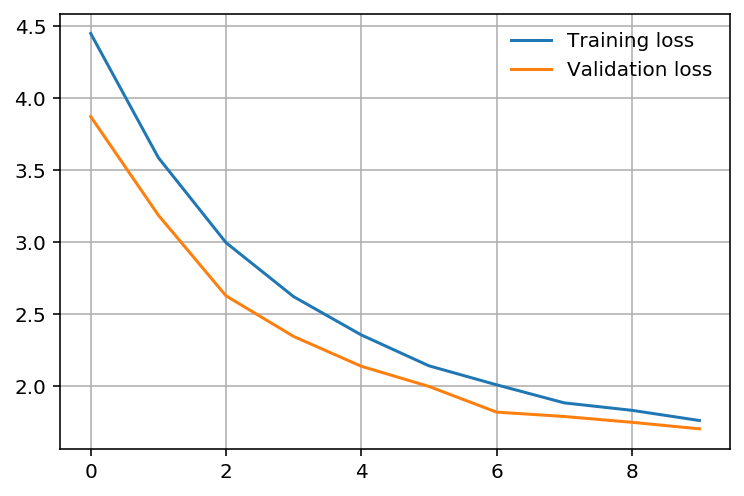

In [63]:
# 성능 분석에 활용하기 위한 결과 plot 하는 방법
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.grid(True)

## **[문제 17]** Transfer learning model training/validation 분석

* validation 과정을 분석하고, 학습을 개선시킨 방법을 validation 결과와 함께 분석하세요

  * tranining loss와 validation loss 그래프를 통해서 분석 권장
  * hyper-parameter, model을 변경하면서 성능 개선한 과정을 최대한 설명하세요
  * Transfer model의 성능 개선을 위해서 사용한 방법을 설명

**[답 작성]**
(더블클릭해서 수정하세요.)
## validation 과정을 분석하고, 학습을 개선시킨 방법을 validation 결과와 함께 분석하세요
#### 처음에는 densenet 121 을 사용 했었다. 그 때의 정확도는 76%정도 였는데 densenet 161을 사용한 후 정확도는 79로 3퍼 가량 오르게 되었다. 또한 training loss 와 validation loss 그래프가 위의 그래프와 같이 일정하게 내려온다.  Linear에 더 많은 다양성을 부여해 봤지만 결과는 크게 차이가 없어 in_feature의 값에서 BREEDS로 변환시키는 것으로 끝냈다.
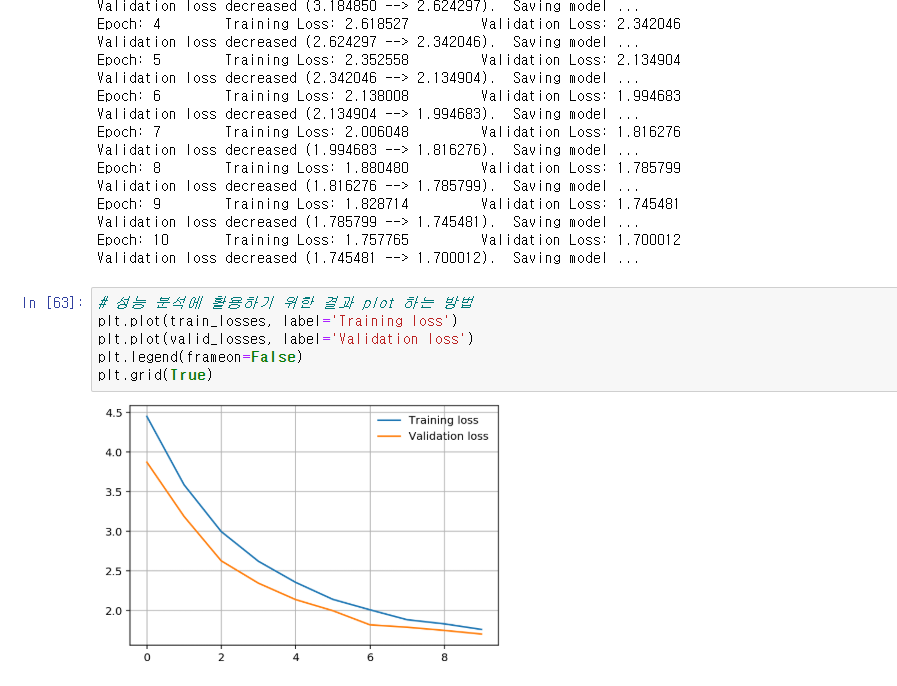

## **[문제 18]** 학습한 모델에 대한 성능 Test

위에서 학습한 모델을 이용하여 개 이미지의 test dataset에서의 예측결과를 확인하세요.<br>
test loss 와 test accuracy를 계산하고 출력하세요.<br>
test accuracy를 확인하세요 (60 % 이상 권장).<br>

해당 `test` 는 위에 구현했던 `test` 함수를 통해 진행하세요.

**[답 작성]**

In [64]:
# 문제 18 답 작성
### 답 작성 부분 ###
test(test_batches, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.993466


Test Accuracy (Overall): 80% (670/836)


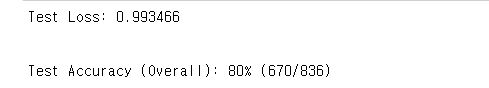

## **[문제 19]** 모델을 이용한 개 품종 반환 모듈

이미지 경로를 input으로 하는 predict_breed_transfer(model, class_names, img_path) 함수 작성<br>
본 함수는 model에서 예측한 개의 품종(`Affenpinscher`, `Afghan hound` 등)을 반환하는 함수를 구현합니다.

* function name : `predict_breed_transfer`
    * input : `model`, `class_names`, `img_path`
        * `model` : 학습된 모델
        * `class_names` : 개의 품종에 대한 이름을 저장한 dictionary (제공함)
        * `img_path` : image가 저장되어 있는 경로 string
    
    * output : `String`
        * model에서 예측한 개의 품종

* 입력 값중 `class_names`는 아래 제공하는 셀 코드를 활용하시면 됩니다
* 경로의 image를 불러오기 위에서 제공한 image_loader 를 활용하세요 (직접 하셔도 문제없습니다)
  * 본 함수에서 사용할 transformation 구성하여 image_loader에 경로와 함께 입력
* cuda 설정 주의해서 구성
* model의 출력 값의 max index (가장 높은 확률 인덱스) 활용

In [52]:
class_names = [item[4:].replace("_", " ") for item in train_batches.dataset.classes]

In [53]:
train_batches.dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [54]:
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [55]:
# 문제 19: predict_breed_transfer 구현

def predict_breed_transfer(model, class_names, img_path):
  
      ### 답 작성 부분 ###
    MEANS = [0.485, 0.456, 0.406]
    # nomalize 값 설정
    DEVIATIONS = [0.229, 0.224, 0.225]
    #이미지사이즈 224 지정
    IMAGE_SIZE=224
    #transform 값 설정
    transform = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(MEANS, DEVIATIONS)
    ])
    #image 설정
    image=image_loader(img_path, transform, use_cuda)
    #idx에 model(image) 의 torch.max값 지정
    
    idx = torch.max(model(image), 1)[1].item()   
    
    
    return class_names[idx]





아래의 코드를 통해 만든 함수를 테스트해 보세요.

image_file_name: myImg\dog1.jpg, 	 predition breed: Parson russell terrier


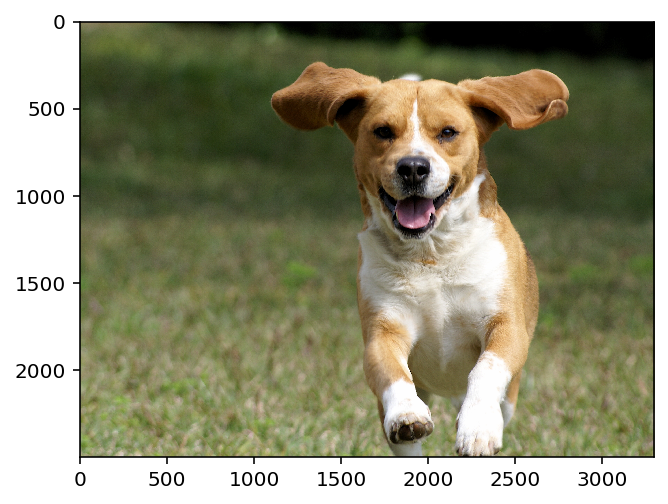

image_file_name: myImg\dogs2.jpg, 	 predition breed: Parson russell terrier


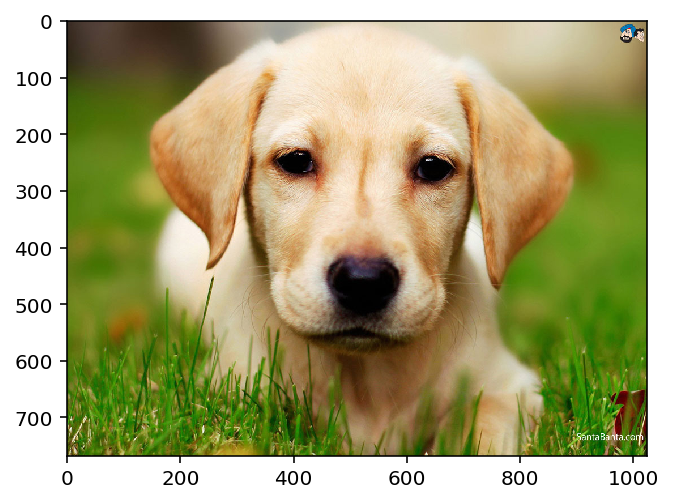

image_file_name: myImg\my_img1.jpg, 	 predition breed: Gordon setter


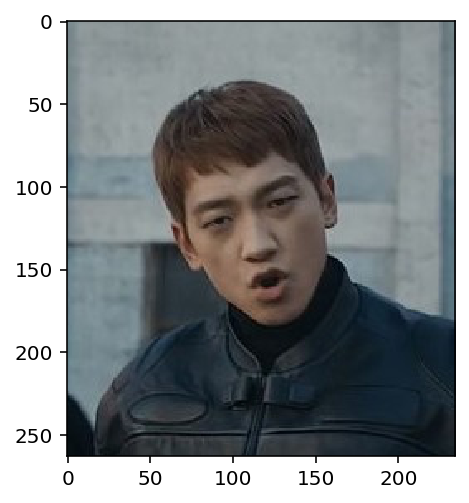

image_file_name: myImg\my_img2.jpg, 	 predition breed: Parson russell terrier


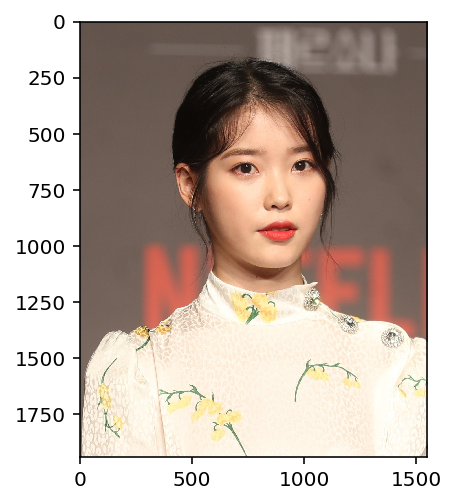

image_file_name: myImg\my_img3.jpg, 	 predition breed: Parson russell terrier


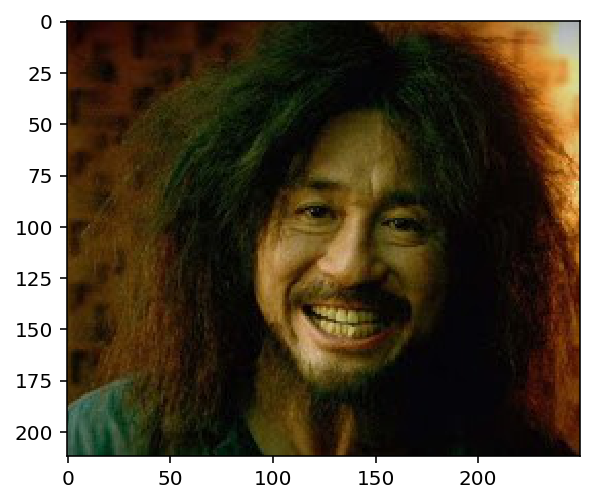

image_file_name: myImg\my_img4.jpg, 	 predition breed: Finnish spitz


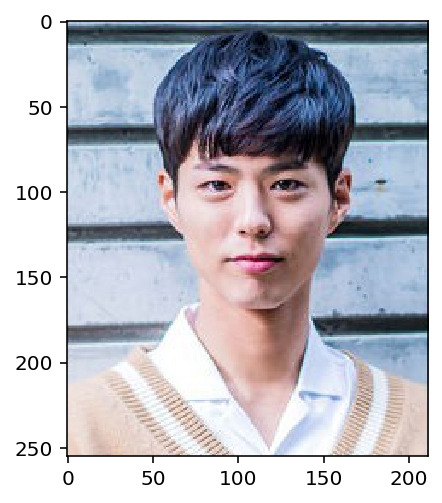

image_file_name: myImg\my_img5.jfif, 	 predition breed: Chinese shar-pei


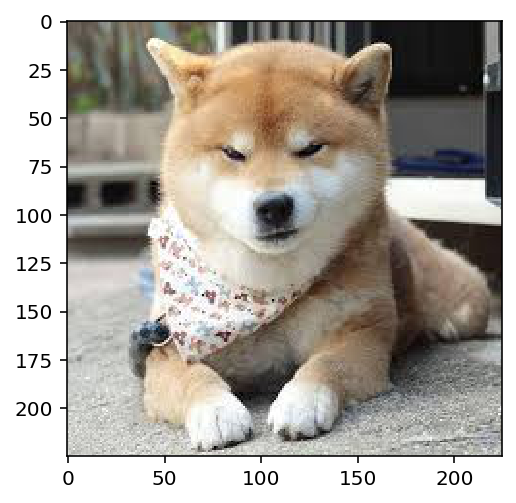

image_file_name: myImg\my_img6.jpg, 	 predition breed: Gordon setter


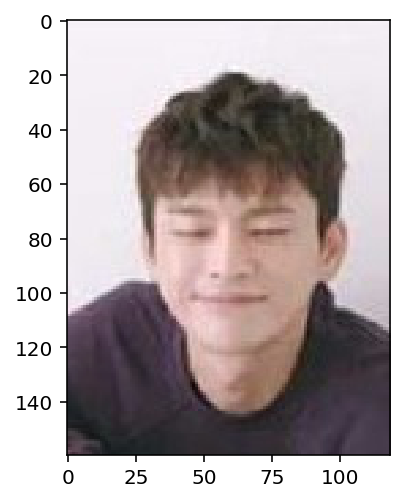

image_file_name: myImg\shadow_cat.JPG, 	 predition breed: Finnish spitz


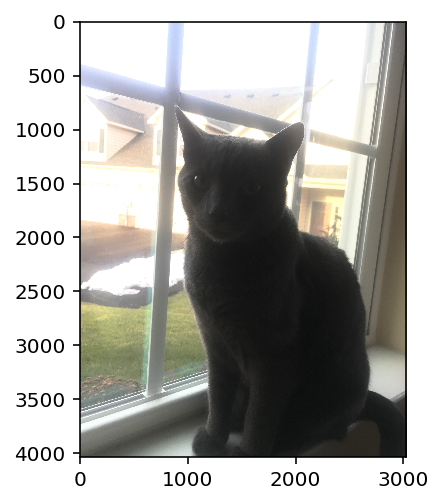

In [56]:
dirs = os.listdir('myImg')

for img_file in dirs:
    img_path = os.path.join('myImg', img_file)
    predition = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_path, predition))
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()

---
<a id='step5'></a>
# Step 5: Make Dog Identification App

## 실제 app에 이용할 함수 구현

이미지에 대한 파일 경로를 통해 이미지에 대해서 먼저 사람, 개가 포함되어 있는지 아닌지를 결정하는 함수를 작성하세요.
- 이미지에서 __개__가 감지되면 예측 된 __품종__을 반환하십시오.
- 이미지에서 __사람__이 감지되면 __유사한 개 품종__을 반환하십시오.
- 이미지에서 __둘 다__ 아니라면 __오류__를 출력하십시오.

이미지에서 사람과 개를 감지하기 위한 함수를 작성할 수 있습니다.<br>
또한, 위에서 개발한 `face_detector` 및 `dog_detector` 함수를 자유롭게 사용하셔도 됩니다.<br>
개 품종을 예측하는 경우에는 Step 4 의 CNN을 사용해야합니다.

![Sample Human Output](https://drive.google.com/uc?export=view&id=1K7S1YJ4VflBCVKiioe2SkNkEEihUp-uI)

In [57]:
def run_app(img_path):
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(model_transfer,class_names,img_path)
        print("Dog detected \n It looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(model_transfer,class_names,img_path)
        print("Human detected \n It looks like a {0}".format(prediction))
    else:
        print("Nothing detected")


---
<a id='step6'></a>
# Step 6: 완성본 실험

이전 단계에서 구현한 app을 이용하여 해당 app을 사용하고 놀아봅니다.<br>
여러 이미지를 app을 통해 결과를 확인해보세요.<br>
- 여러분의 이미지를 직접 업로드하고 어떤 종류의 개가 닮았다고 출력되나요?<br>
- 개의 이미지를 직접 업로드하고 개 품종을 정확하게 예측하나요? 
- 고양이의 이미지를 직접 업로드하고 고양이를 개라고 예측하나요? 예측한다면 어떻게 예측하나요?
- 원하시면 본인 사진으로 테스트해보세요

## 구현한 Dog Identification App Test
위의 확인해야 하는 이미지의 결과를 확인하고,<br>
6개 이상의 다른 이미지를 넣어 결과를 확인하세요.<br>
원하는 이미지를 자유롭게 사용하십시오.<br>
단, 사람과 강아지의 이미지는 두 개 이상의 이미지를 사용하세요.

image_file_name: myImg\dog1.jpg, 	 predition breed: Parson russell terrier


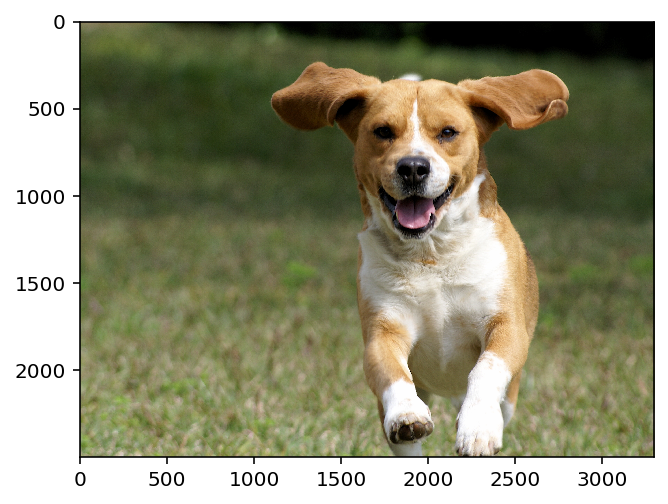

image_file_name: myImg\dogs2.jpg, 	 predition breed: Parson russell terrier


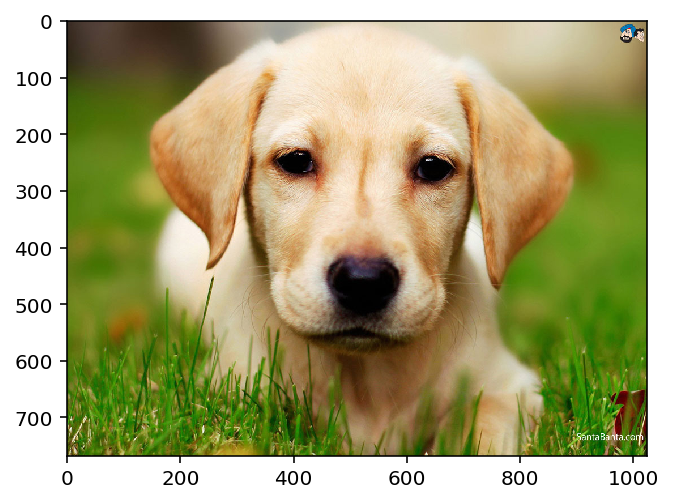

image_file_name: myImg\my_img1.jpg, 	 predition breed: Gordon setter


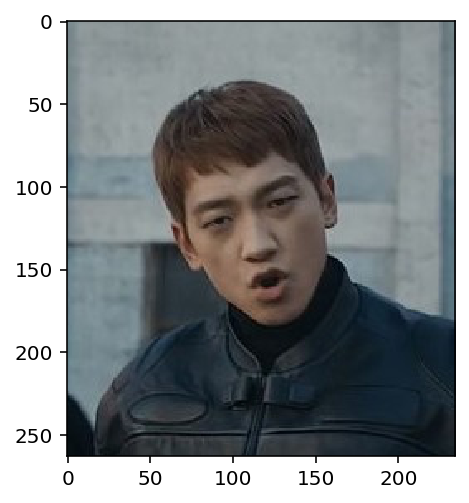

image_file_name: myImg\my_img2.jpg, 	 predition breed: Parson russell terrier


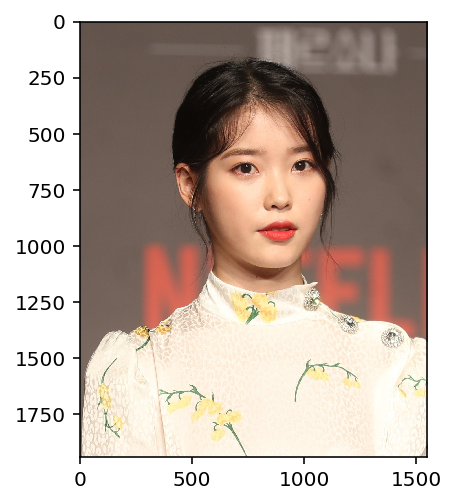

image_file_name: myImg\my_img3.jpg, 	 predition breed: Parson russell terrier


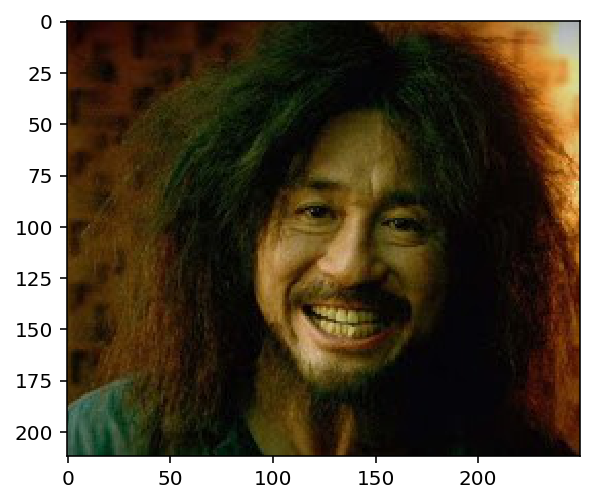

image_file_name: myImg\my_img4.jpg, 	 predition breed: Finnish spitz


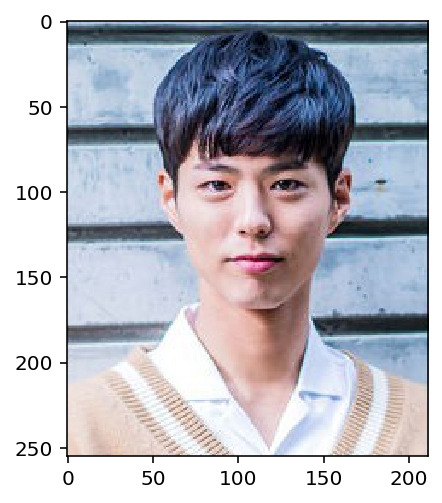

image_file_name: myImg\my_img5.jfif, 	 predition breed: Chinese shar-pei


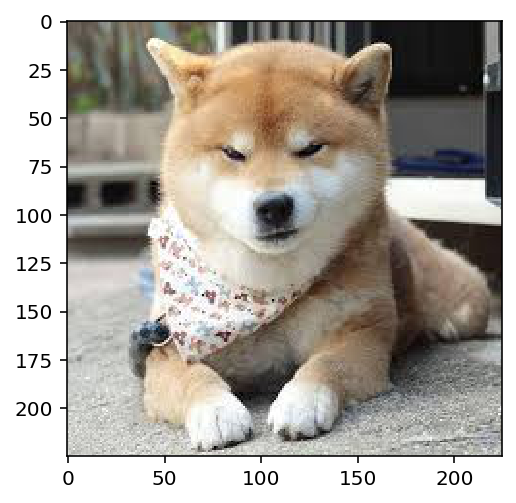

image_file_name: myImg\my_img6.jpg, 	 predition breed: Gordon setter


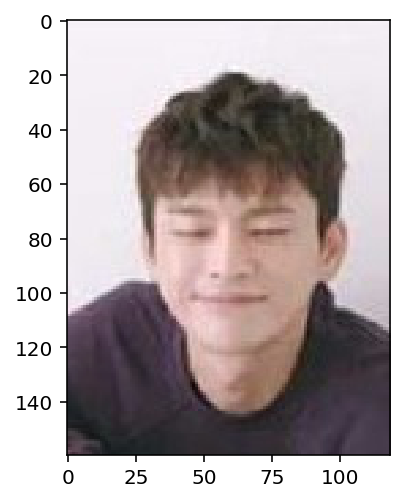

image_file_name: myImg\shadow_cat.JPG, 	 predition breed: Finnish spitz


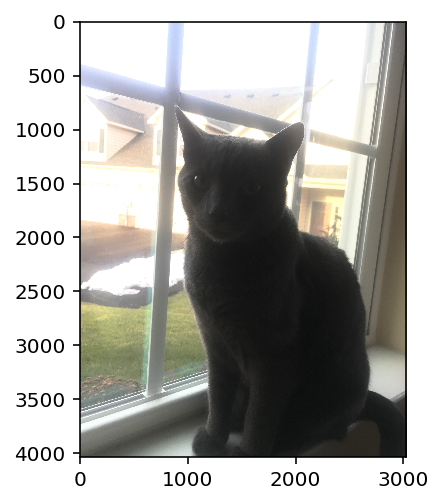

In [58]:
dirs = os.listdir('myImg')

for img_file in dirs:
    img_path = os.path.join('myImg', img_file)
    predition = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_path, predition))
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()

## **[문제 20]** 프로젝트를 마무리 하면서...

위의 프로젝트에 대한 자체 평가와 총평을 적어주세요 [점수가 들어가는 문제는 아닙니다]

__[답 작성]__

# 참고자료 목차

- [1] 문제 7번 BatchNorm2d의 관하여 https://pytorch.org/docs/master/generated/torch.nn.BatchNorm2d.html

# 부록 1: Latex 수식 예제

- 글 중간에 수식은 `$` 수식 `$`의 형태로 작성하며, $x^{(i)}_j$, $\max\{z, v\}$, $\log(1+x)$, $f(x)=\frac{1}{1+e^{-x}}$ 등과 같이 사용합니다.
- 큰 한줄 수식은 
```
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$
```
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$
와 같이 사용가능하며, 여러 줄의 경우는
```
\begin{align}
p(y=j|x; \theta) &=\textrm{Softmax}(\theta_j^Tx)\\
&= \frac{e^{\theta_j^T x}}{\sum_{i=1}^n e^{\theta_i^T x}} 
\end{align}
```
를 사용하면 아래와 같이 표시합니다.
\begin{align}
p(y=j|x; \theta) &=\textrm{Softmax}(\theta_j^Tx)\\
&= \frac{e^{\theta_j^T x}}{\sum_{i=1}^n e^{\theta_i^T x}} 
\end{align}

여기서 `&` 기호에 맞춰서 줄을 맞춰서 표시합니다. 여기 예제에서는 `=` 표시에 줄을 맞춰서 표시하죠. `\\` 는 줄바꿔줄때 사용하는 명령입니다

* 행렬의 경우는

$$
A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}
 $$

등을 사용할 수 있습니다.

[다른 예제](http://tomoyo.ivyro.net/123/wiki.php/TeX_%EB%B0%8F_LaTeX_%EC%88%98%EC%8B%9D_%EB%AC%B8%EB%B2%95)


# 부록 2: Markdown에 이미지 추가하기

```markdown
![대체 텍스트](이미지 경로)
```
위의 코드를 이용해 Markdown에 이미지를 추가할 수 있습니다.<br>
이미지의 경우 해당 이미지를 파일로 저장하여 이미지 경로를 직접 적어 추가 할 수 
있습니다.<br>

단, 이미지의 경로는 드라이브에 업로드한 파일의 경로를 적어야합니다.

1. [Google Drive](https://drive.google.com/drive) 에 접속하여 폴더를 하나 만든다.
2. 만든 폴더에 추가할 이미지를 업로드 한다.
3. 업로드 된 이미지를 우클릭하여 공유를 누른다.

4. [링크 보기] 에서 한림대학교에서 모든사용자로 바꾼다.
5. 링크에서 파일 ID를 가져온다. [ ex) http: ~ /d/**[파일 ID]**/view?usp=sharing ]
6. 위의 방법으로 가져온 파일 ID 를 http://drive.google.com/uc?export=view&id=[파일_ID] 에 입력하여 이미지 경로를 만들고 만든 경로를 이미지 경로 입력 부분에 입력한다.

- 대체 텍스트의 경우 이미지가 보이지 않으면 출력되는 텍스트이다.

# 부록 3: PDF 파일 & html 파일로 저장 하기

1. PDF 파일로 저장하는 방법(colab에서 최종 프로젝트를 진행하는 경우 해당 방법이 더 편합니다.)
- 브라우저는 크롬을 이용한다.
- colab의 위쪽 메뉴에 `[파일]` 을 클릭 후 `[인쇄]` 클릭
- 대상 `[PDF로 저장]`, 페이지 `[전체]`, 레이아웃 `[세로방향]` 선택
- 설정 더보기 클릭 후, 용지크기 `[A4]`, 시트당 페이지 수 `[1]`, 여백 `[기본값]`, 배율 `[맞춤설정, 70]`, 옵션 `[모두체크해제]` 선택
- `[저장]` 클릭

![예시이미지](http://drive.google.com/uc?export=view&id=1VFraRT_wKDu6qydWIWXcsHZ93Lfe0cM3)

2. html 파일로 저장하는 방법(로컬 컴퓨터에서 최종 프로젝트를 진행하는 경우 해당 방법이 더 편합니다.)
- 사용하는 브라우저는 상관없습니다.
- 프로젝트 jupyter notebook을 엽니다.
- 해당 페이지의 위쪽 메뉴에 [File]을 클릭
- [Download as]라는 메뉴 하위 메뉴에 HTML(.html) 메뉴를 클릭

위의 두가지 방법 모두 Markdown의 이미지, 코드의 출력결과를 포함하여 저장되었는지 확인하고 제출해주세요!
